# Problem Statement

## Goal
I am tasked with creating a regression model based on the Ames Iowa Housing Dataset. This model will predict the price of a house at sale.

My goal is to create the simplest possible regression model (parsimony) that would predict price of a house at sales accurately. The model should also be able to predict price of a house at sales accurately on an unseen set of predictor variables (generalizability).


??????????????Similarly, Machine Learning algorithms work on one simple rule — Garbage In, Garbage Out. ‘Garbage in’ refers to noisy, less correlated data, and ‘Garbage out’ refers to poor performance of the algorithm.

## Evaluation criteria
The model's success will be evaluated by .....r2? mse? r2 change?
i will train, test split... there will be a validation set 
better than baseline model 

## Benefits/purpose????
Is it clear what the student plans to do?
What type of model will be developed?
How will success be evaluated?
Is the scope of the project appropriate?
Is it clear who cares about this or why this is important to investigate?
Does the student consider the audience and the primary and secondary stakeholders?



# Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PowerTransformer, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import r2_score

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

In [3]:
test.Id.sort_values(ascending=True)

704       2
706       4
120       6
312       7
401      17
       ... 
537    2919
179    2921
829    2922
669    2925
675    2928
Name: Id, Length: 879, dtype: int64

In [4]:
train.Id.sort_values(ascending=True)

1080       1
304        3
574        5
1673       8
458        9
        ... 
1013    2924
1478    2926
416     2927
651     2929
522     2930
Name: Id, Length: 2051, dtype: int64

In [5]:
print(train.shape, test.shape)

(2051, 81) (879, 80)


In [6]:
#Adding a column to id that it is from train or test set
train['data_from'] = 'train'
test['data_from'] = 'test'


In [7]:
ames = pd.concat([train, test])
ames.shape

(2930, 82)

In [8]:
missing_count = ames.isnull().sum().sort_values(ascending=False)[ames.isnull().sum().sort_values(ascending=False)>0]
missing_count

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
SalePrice          879
Lot Frontage       490
Garage Yr Blt      159
Garage Qual        159
Garage Finish      159
Garage Cond        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Cond           80
Bsmt Qual           80
Mas Vnr Area        23
Mas Vnr Type        23
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Garage Cars          1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Total Bsmt SF        1
Electrical           1
dtype: int64

In [9]:
#% of missing value
missing_percent=round(missing_count/2930, 2)
missing_percent

Pool QC           1.00
Misc Feature      0.96
Alley             0.93
Fence             0.80
Fireplace Qu      0.49
SalePrice         0.30
Lot Frontage      0.17
Garage Yr Blt     0.05
Garage Qual       0.05
Garage Finish     0.05
Garage Cond       0.05
Garage Type       0.05
Bsmt Exposure     0.03
BsmtFin Type 2    0.03
BsmtFin Type 1    0.03
Bsmt Cond         0.03
Bsmt Qual         0.03
Mas Vnr Area      0.01
Mas Vnr Type      0.01
Bsmt Half Bath    0.00
Bsmt Full Bath    0.00
Garage Area       0.00
Garage Cars       0.00
Bsmt Unf SF       0.00
BsmtFin SF 2      0.00
BsmtFin SF 1      0.00
Total Bsmt SF     0.00
Electrical        0.00
dtype: float64

In [10]:
#drop those that have 80% or more missing 

ames.drop(["Misc Feature", "Alley", "Fence", 'Pool QC' ], axis=1, inplace=True)
ames.shape

(2930, 78)

In [11]:
#filter and print out only those with more than 0 isnull and sort them in decreasing order

ames.isnull().sum().sort_values(ascending=False)[ames.isnull().sum().sort_values(ascending=False)>0]

Fireplace Qu      1422
SalePrice          879
Lot Frontage       490
Garage Qual        159
Garage Finish      159
Garage Cond        159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Electrical           1
Total Bsmt SF        1
dtype: int64

In [12]:
ames.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  109  533352170           60        RL           NaN     13517   Pave   
1  544  531379050           60        RL          43.0     11492   Pave   
2  153  535304180           20        RL          68.0      7922   Pave   
3  318  916386060           60        RL          73.0      9802   Pave   
4  255  906425045           50        RL          82.0     14235   Pave   

  Lot Shape Land Contour Utilities  ... Enclosed Porch 3Ssn Porch  \
0       IR1          Lvl    AllPub  ...              0          0   
1       IR1          Lvl    AllPub  ...              0          0   
2       Reg          Lvl    AllPub  ...              0          0   
3       Reg          Lvl    AllPub  ...              0          0   
4       IR1          Lvl    AllPub  ...              0          0   

  Screen Porch Pool Area Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  \
0            0         0        0       3    2010        WD    130500.0   
1            0         0        0       4    2009        WD    220000.0   
2            0         0        0       1    2010        WD    109000.0   
3            0         0        0       4    2010        WD    174000.0   
4            0         0        0       3    2010        WD    138500.0   

   data_from  
0      train  
1      train  
2      train  
3      train  
4      train  

[5 rows x 78 columns]

In [13]:
ames.tail()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
874  1662  527377110           60        RL          80.0      8000   Pave   
875  1234  535126140           60        RL          90.0     14670   Pave   
876  1373  904100040           20        RL          55.0      8250   Pave   
877  1672  527425140           20        RL          60.0      9000   Pave   
878  1939  535327160           20        RL          70.0      8400   Pave   

    Lot Shape Land Contour Utilities  ... Enclosed Porch 3Ssn Porch  \
874       Reg          Lvl    AllPub  ...              0          0   
875       Reg          Lvl    AllPub  ...              0          0   
876       Reg          Lvl    AllPub  ...              0          0   
877       Reg          Lvl    AllPub  ...              0          0   
878       Reg          Lvl    AllPub  ...              0          0   

    Screen Porch Pool Area Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  \
874            0         0        0      11    2007        WD         NaN   
875            0         0        0       8    2008        WD         NaN   
876            0         0        0       8    2008        WD         NaN   
877            0         0        0       5    2007        WD         NaN   
878            0         0        0       3    2007        WD         NaN   

     data_from  
874       test  
875       test  
876       test  
877       test  
878       test  

[5 rows x 78 columns]

In [14]:
#can see total entries, total columns (ie. tell you the shape as well), number of entries per col and data types
#thus we dont need .dtypes and .shape

ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual   

**Interesting observations about variables with high missing values**

After looking at what these variable mean. 

All of this missing values are features of a house. This are features that not all houses may have. For example, some houses may not have a pool or a frontage or mansory or garages. 

For variables such as Bsmt Unf SF, those without a basement will have left these type of variables blank.

There is support for this. If we take a look at Garage Finish, if one does not have a garage, he will not have a garage finish. Thus, may fill it with NA or left it blank. In that case, other garage related variables should be filled with NA or left blank. We see that the number of missing variables in garage related vairables are roughly similar. This is observed in basement related variables and basement finish/features(bathroom) related variables.

In [15]:
#lets check if those values really correspond
#if they ask about garage area and they dont have a garage, the garage finish should also be NaN

print(ames.loc[ames["Mas Vnr Area"].isnull(), ["Mas Vnr Type", "Mas Vnr Area"]])
print("---------------------------------")
print(ames.loc[ames["Bsmt Full Bath"].isnull(), ["BsmtFin Type 1", "Bsmt Full Bath"]])
print("---------------------------------")
print(ames.loc[ames["Bsmt Half Bath"].isnull(), ["BsmtFin Type 1", "Bsmt Half Bath"]])
print("---------------------------------")
print(ames.loc[ames["BsmtFin SF 1"].isnull(), ["BsmtFin Type 1", "BsmtFin SF 1"]])
print("---------------------------------")
print(ames.loc[ames["Garage Cars"].isnull(), ["Garage Finish", "Garage Cars"]])
print("---------------------------------")
print(ames.loc[ames["Garage Area"].isnull(), ["Garage Finish", "Garage Area"]])
print("---------------------------------")
print(ames.loc[ames["BsmtFin SF 2"].isnull(), ["BsmtFin Type 1", "BsmtFin SF 2"]])
print("---------------------------------")
print(ames.loc[ames["Total Bsmt SF"].isnull(), ["BsmtFin Type 1", "Total Bsmt SF"]])
print("---------------------------------")
print(ames.loc[ames["Bsmt Unf SF"].isnull(), ["BsmtFin Type 1", "Bsmt Unf SF"]])
print("---------------------------------")
print(ames.loc[ames["Fireplace Qu"].isnull(), ["Fireplace Qu", "Fireplaces"]])


     Mas Vnr Type  Mas Vnr Area
22            NaN           NaN
41            NaN           NaN
86            NaN           NaN
212           NaN           NaN
276           NaN           NaN
338           NaN           NaN
431           NaN           NaN
451           NaN           NaN
591           NaN           NaN
844           NaN           NaN
913           NaN           NaN
939           NaN           NaN
1025          NaN           NaN
1244          NaN           NaN
1306          NaN           NaN
1430          NaN           NaN
1434          NaN           NaN
1606          NaN           NaN
1699          NaN           NaN
1815          NaN           NaN
1820          NaN           NaN
1941          NaN           NaN
866           NaN           NaN
---------------------------------
     BsmtFin Type 1  Bsmt Full Bath
616             NaN             NaN
1327            NaN             NaN
---------------------------------
     BsmtFin Type 1  Bsmt Half Bath
616             NaN 

In [16]:
#Check they are gone
ames.columns


Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', '

In [17]:
#now that we know it is highly likely those missing are because they dont have this feature in their house
#for those that are dtype objects, lets fill with donthave so it will be a dummy column later
#but since we going to one-hot encode the dummy var, it will be dropped later anyway~

for col in ames:
    if ames[col].dtype == "O":
        ames[col].fillna("donthave", inplace=True)
    else:
        pass
    

In [18]:
#loop all column to impute NaN to 0 if they are int and float types

for col in ames:
    if ames[col].dtype == "int64" or "float64":
        ames[col].fillna(value=0, inplace=True)
    else:
        pass

In [19]:
#check if donthave is successful
ames["Garage Cond"].value_counts()

TA          2665
donthave     159
Fa            74
Gd            15
Po            14
Ex             3
Name: Garage Cond, dtype: int64

In [20]:
#WOW!!! like no missing like that!! lol ><

ames.isnull().sum().sort_values(ascending=False)[ames.isnull().sum().sort_values(ascending=False)>0]

Series([], dtype: int64)

**Imputing/dropping missing data**

I mapped out the non_continuous data with another column that could help us better deduce if they were missing because they did not have such a feature. For the variables that i was reasonably able to deduce this, I fill the missing data as "donthave" to indicate that they do not have such a feature in their house. For continous (or discrete) variables, I impute 0 after deduction.

I am left with Misc Feature, Alley and Fence. These features are harder to determine if it is an absense of such a feature or a true missing value. Despite my suspicion that they are indeed an absesnce of a certin feature. I choose to be conservative and drop this variables completely as they have more than 50% missing data, where 50% is 1025 data points. 

**Reducing features**

We can see that many variables are actually very similar to each other or may are a repeat of each other. For example, if we take the sum of BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, we would get the same number as Total Bsmt SF. Similarly, in the ordinal variable example Exter Cond,Bsmt Cond,Garage Cond, Overall Cond are all closely related and we can just take Overall Cond to represent condition. This type of repeats are redundent and may would cause multicolinearity amongst variables. Below sums up the actions taken to reduce such variables. 


| Similar/Related Variables | Action taken |
| :-- | :----------- |
|BsmtFin SF 1<br>BsmtFin SF 2<br>Bsmt Unf SF<br>Total Bsmt SF<br>1st Flr SF<br>2nd Flr SF<br>Low Qual Fin SF<br>Gr Liv Area<br>Open Porch SF<br>Enclosed Porch<br>3-Ssn Porch<br>Screen Porch<br>garage cars<br>garage area<br>|sum totals for each type<br> get new variable called total sf|
|Bsmt Full Bath<br>Half Bath<br>Full Bath<br>Bsmt Half Bath|create Total bath by summing all<br>1 for full bathrooms and 0.5 for half bathrooms.|
|Kitchen AbvGr<br>Bedroom AbvGr<br>TotRms AbvGrd|drop all but TotRms AbvGrd|
|Exter Qual<br>Bsmt Qual<br>Kitchen Qual<br>Heating QC<br>Garage Qual<br>Fireplace Qu<br>Pool QC<br>Overall Qual|drop all but Overall Qual|
|Exter Cond<br>Bsmt Cond<br>Garage Cond<br>Overall Cond|drop all but Overall Cond|
|Yr Sold<br>Year Built<br>Mo Sold|age_when_sold = Yr Sold - Year Built<br>Mo Sold dropped|
|Yr Sold<br>Year Remod/Add|age_since_reno = Yr Sold - Year Remod/Add |
|Garage Yr Blt<br>|Garage_age = Yr Sold - Garage Yr Blt|


In [21]:
ames["total_porch_SF"]= ames[['Open Porch SF', 'Enclosed Porch','3Ssn Porch', 'Screen Porch']].sum(axis=1) 
ames["Half Bath"]=ames["Half Bath"]/2
ames["Bsmt Half Bath"]=ames["Bsmt Half Bath"]/2
ames["total_bath"]= ames[["Bsmt Full Bath", "Half Bath","Full Bath", "Bsmt Half Bath"]].sum(axis=1) 
ames["age_when_sold"]= ames["Yr Sold"]-ames["Year Built"]
ames["age_since_reno"]= ames["Yr Sold"]-ames["Year Remod/Add"]
ames["age_garage"]= ames["Yr Sold"]-ames["Garage Yr Blt"]
ames["total_SF"]= ames['Total Bsmt SF'] + ames['Gr Liv Area'] + ames["total_porch_SF"] + ames["Garage Area"]

In [22]:
ames.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', '

In [23]:
ames.drop(["total_porch_SF","Half Bath","Bsmt Half Bath",
           "BsmtFin SF 1","BsmtFin SF 2","Bsmt Unf SF","Total Bsmt SF",
           "1st Flr SF", "2nd Flr SF", "Low Qual Fin SF", "Gr Liv Area",
           "Open Porch SF", "Enclosed Porch", "3Ssn Porch", "Screen Porch",
           "Garage Cars", "Garage Area","Year Remod/Add","Garage Yr Blt",
           "Bsmt Full Bath","Half Bath","Full Bath","Bsmt Half Bath","Kitchen AbvGr",
           "Bedroom AbvGr","Exter Qual","Bsmt Qual","Kitchen Qual","Heating QC",
           "Garage Qual","Fireplace Qu","Exter Cond","Bsmt Cond",
           "Garage Cond","Yr Sold","Year Built","Mo Sold","Yr Sold",], axis=1, inplace=True)

## EDA

The exploratory data analysis will be divided into smaller sections for easy reading purposes. It will be divided by the measurement datatypes. I define the types below, to guide readers. 

Datatypes: 

- Ordinal: Variables with an ordered series. Although ordinal data are distinctive categorical groups, it increase in magnitude. This research, like many, infers quantity from order and treats it as a quantitative variable. For example, in this dataset, Land slope can be measured by degree of allevation. However, the data was collected such that it only reports a gentle, moderate and severe slope. This are increasing order of allevation and can be treated as continuous. 
    
- Discrete/Continuous: Discrete variables are based on counts (eg. Garage Cars) and continuous data are those that can be measured on a continuum (eg. Lot Area). 

- Norminal/binary: Variables with no inherent order or ranking sequece. In this research, categorical variables are used as a term to refer to these variables as well, even though, the true meaning of categorical data would inlude ordinal data. This research infers quantity from order and treats it as a quantitative variable. For example, Paved vs Gravel street. 


### Exploring Continuous, Discrete, Ordinal


In [24]:
ames.shape

(2930, 49)

In [25]:
ames.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Foundation', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Finish', 'Paved Drive', 'Wood Deck SF', 'Pool Area', 'Misc Val',
       'Sale Type', 'SalePrice', 'data_from', 'total_bath', 'age_when_sold',
       'age_since_reno', 'age_garage', 'total_SF'],
      dtype='object')

In [26]:
#df for ordinal 
ord_var=["Lot Shape", "Utilities", "Land Slope", "Bsmt Exposure", 
        "BsmtFin Type 1", "BsmtFin Type 2", "Electrical", "Functional", 
        "Garage Finish", "Paved Drive","Overall Cond", "Overall Qual", 
         "MS SubClass"]


ames_ord = ames[ord_var]
ames_ord.head()

Lot Shape Utilities Land Slope Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2  \
0       IR1    AllPub        Gtl            No            GLQ            Unf   
1       IR1    AllPub        Gtl            No            GLQ            Unf   
2       Reg    AllPub        Gtl            No            GLQ            Unf   
3       Reg    AllPub        Gtl            No            Unf            Unf   
4       IR1    AllPub        Gtl            No            Unf            Unf   

  Electrical Functional Garage Finish Paved Drive  Overall Cond  Overall Qual  \
0      SBrkr        Typ           RFn           Y             8             6   
1      SBrkr        Typ           RFn           Y             5             7   
2      SBrkr        Typ           Unf           Y             7             5   
3      SBrkr        Typ           Fin           Y             5             5   
4      SBrkr        Typ           Unf           N             8             6   

   MS SubClass  
0           60  
1           60  
2           20  
3           60  
4           50

In [27]:
for i in ord_var:
    print(ames[i].value_counts())
    print("----------")

Reg    1859
IR1     979
IR2      76
IR3      16
Name: Lot Shape, dtype: int64
----------
AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64
----------
Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64
----------
No          1906
Av           418
Gd           284
Mn           239
donthave      83
Name: Bsmt Exposure, dtype: int64
----------
GLQ         859
Unf         851
ALQ         429
Rec         288
BLQ         269
LwQ         154
donthave     80
Name: BsmtFin Type 1, dtype: int64
----------
Unf         2499
Rec          106
LwQ           89
donthave      81
BLQ           68
ALQ           53
GLQ           34
Name: BsmtFin Type 2, dtype: int64
----------
SBrkr       2682
FuseA        188
FuseF         50
FuseP          8
Mix            1
donthave       1
Name: Electrical, dtype: int64
----------
Typ     2728
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sal        2
Sev        2
Name: Functional, dtype: int64
----------
Unf 

In [28]:
#too little responses in values will be dropped. 
#eg. utilities only have 2 and 1 for NoSewr and NoSewa. 
ames.drop(['Utilities'], axis=1, inplace=True)


In [29]:
#coding ordinal variables
#i will code such that the larger number represents more of something 
#this is very very painful

ames["Lot Shape"]=ames["Lot Shape"].map({"donthave":0,"IR3":1, "IR2":2,"IR1":3, "Reg":4})
ames["Land Slope"]=ames["Land Slope"].map({"donthave":0,"Gtl":1, "Mod":2,"Sev":3})
ames["Bsmt Exposure"]=ames["Bsmt Exposure"].map({"donthave":0, "NA":0, "No":0,"Mn":1, "Av":2,"Gd":3})
ames["BsmtFin Type 1"]=ames["BsmtFin Type 1"].map({"donthave":0,"NA":0, "Unf":1,"LwQ":2, "Rec":3,"BLQ":4, "ALQ":5,"GLQ":6})
ames["BsmtFin Type 2"]=ames["BsmtFin Type 2"].map({"donthave":0,"NA":0, "Unf":1,"LwQ":2, "Rec":3,"BLQ":4, "ALQ":5,"GLQ":6})
ames["Electrical"]=ames["Electrical"].map({"donthave":0,"NA":0,"Mix":1, "FuseP":2,"FuseA":3, "SBrkr":4})
ames["Functional"]=ames["Functional"].map({"donthave":0,"NA":0,"Sal":1, "Maj2":2,"Maj1":3, "Mod":4, "Min2":5, "Min1":6, "Typ":7})
ames["Garage Finish"]=ames["Garage Finish"].map({"donthave":0,"NA":0, "Unf":1,"RFn":2, "Fin":3})
ames["Paved Drive"]=ames["Paved Drive"].map({"donthave":0,"N":1, "P":2,"Y":3})




In [30]:
ames.shape

(2930, 48)

In [31]:
ord_var.remove("Utilities")

In [32]:
#change all to int

ames[ord_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Shape       2930 non-null   int64  
 1   Land Slope      2930 non-null   int64  
 2   Bsmt Exposure   2930 non-null   int64  
 3   BsmtFin Type 1  2930 non-null   int64  
 4   BsmtFin Type 2  2930 non-null   int64  
 5   Electrical      2880 non-null   float64
 6   Functional      2928 non-null   float64
 7   Garage Finish   2930 non-null   int64  
 8   Paved Drive     2930 non-null   int64  
 9   Overall Cond    2930 non-null   int64  
 10  Overall Qual    2930 non-null   int64  
 11  MS SubClass     2930 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 297.6 KB


In [33]:
ames.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Foundation', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Finish', 'Paved Drive', 'Wood Deck SF', 'Pool Area', 'Misc Val',
       'Sale Type', 'SalePrice', 'data_from', 'total_bath', 'age_when_sold',
       'age_since_reno', 'age_garage', 'total_SF'],
      dtype='object')

In [34]:
conti_var= ['Lot Frontage', 'Lot Area','Mas Vnr Area', 
            'Wood Deck SF','Pool Area', 
            'Misc Val','TotRms AbvGrd','Fireplaces','total_bath',
           'age_when_sold','age_since_reno', 'age_garage', 'total_SF']

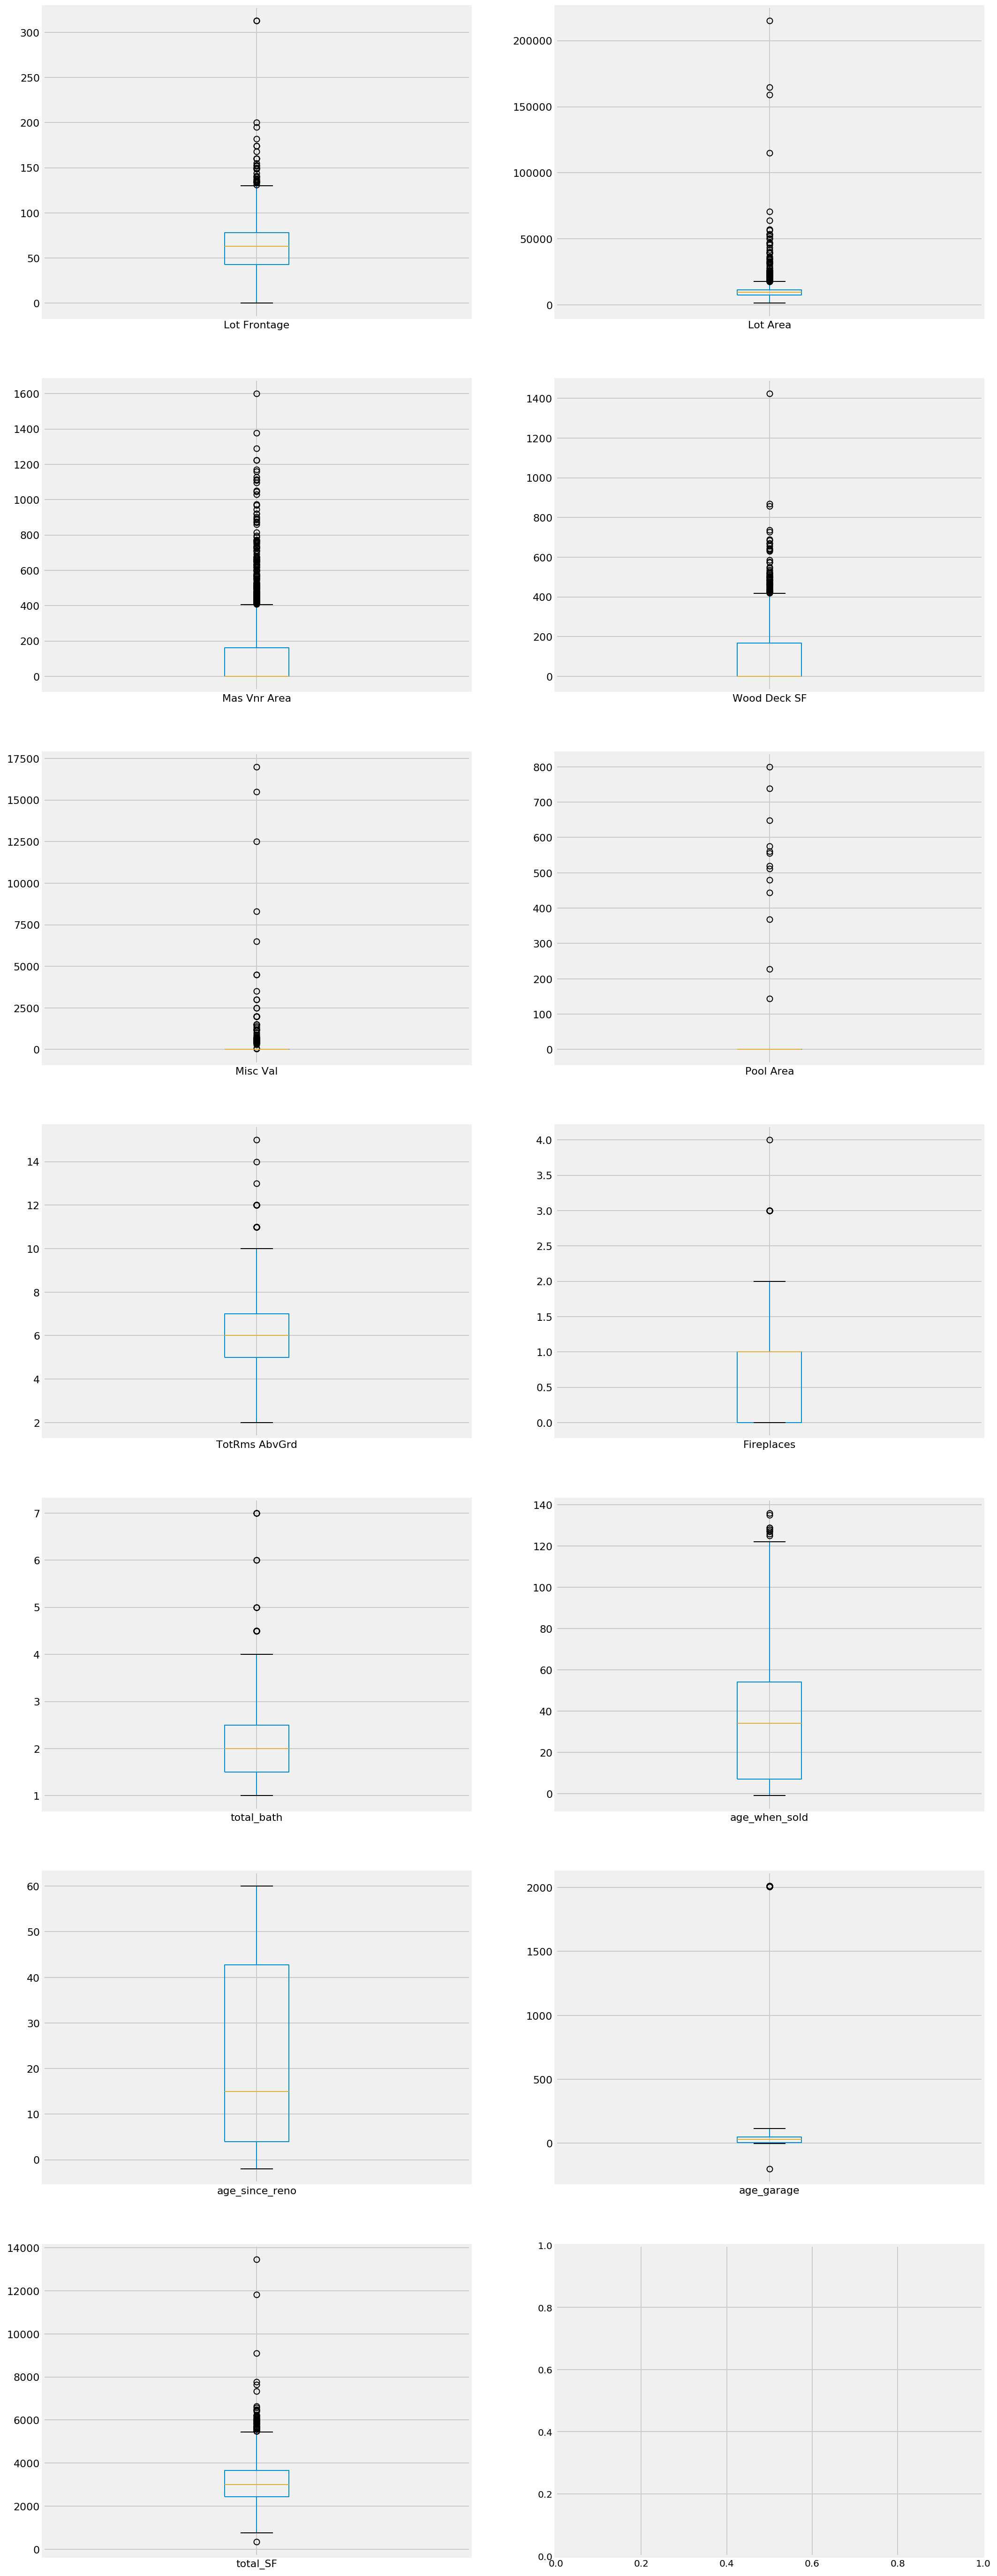

In [35]:
#boxplot for only continous variables and DV
fig, axes = plt.subplots(7,2, figsize=(16,50))

ames['Lot Frontage'].plot(kind="box", fontsize=11, ax=axes[0][0])
ames['Lot Area'].plot(kind="box", fontsize=11, ax=axes[0][1])
ames['Mas Vnr Area'].plot(kind="box", fontsize=11, ax=axes[1][0])
ames['Wood Deck SF'].plot(kind="box", fontsize=11, ax=axes[1][1])
ames['Pool Area'].plot(kind="box", fontsize=11, ax=axes[2][1])
ames['Misc Val'].plot(kind="box", fontsize=11, ax=axes[2][0])
ames['TotRms AbvGrd'].plot(kind="box", fontsize=11, ax=axes[3][0])
ames['Fireplaces'].plot(kind="box", fontsize=11, ax=axes[3][1])
ames['total_bath'].plot(kind="box", fontsize=11, ax=axes[4][0])
ames['age_when_sold'].plot(kind="box", fontsize=11, ax=axes[4][1])
ames['age_since_reno'].plot(kind="box", fontsize=11, ax=axes[5][0])
ames['age_garage'].plot(kind="box", fontsize=11, ax=axes[5][1])
ames['total_SF'].plot(kind="box", fontsize=11, ax=axes[6][0])




In [36]:
#this are the index of outliers and how many outliers there are. outliers = +/3sd
#for conti & discrete var

for col in conti_var:
    sd = np.std(ames[col],ddof=1)
    m = np.mean(ames[col])
    fo= sd*3 + m
    
    a= np.where(np.abs(ames[col])>fo)
    
    print(col, " =\n ", a)
    print("how many = ", np.count_nonzero(a))
    print("-------------------------------------------------------------")
    


Lot Frontage  =
  (array([ 441,  960, 1224, 1263, 1335, 1875, 2222, 2286, 2316, 2720, 2922],
      dtype=int64),)
how many =  11
-------------------------------------------------------------
Lot Area  =
  (array([  24,  108,  441,  471,  616,  694,  745,  823,  841,  960, 1052,
       1167, 1542, 1571, 1726, 1843, 1854, 1875, 1885, 1964, 2127, 2167,
       2265, 2358, 2392, 2418, 2574, 2767, 2921], dtype=int64),)
how many =  29
-------------------------------------------------------------
Mas Vnr Area  =
  (array([  71,   81,  108,  125,  138,  178,  199,  230,  257,  281,  359,
        378,  473,  480,  489,  623,  682,  800,  839,  960,  987, 1117,
       1151, 1170, 1227, 1230, 1254, 1409, 1416, 1420, 1581, 1592, 1604,
       1647, 1671, 1692, 1700, 1737, 1835, 1885, 1936, 1964, 1977, 2041,
       2127, 2131, 2140, 2155, 2167, 2172, 2173, 2281, 2284, 2289, 2309,
       2311, 2382, 2425, 2467, 2515, 2603, 2687, 2773], dtype=int64),)
how many =  63
------------------------------------

Outliers are identified in continuous variables. There are quite a few outliers in this dataset, based on the 3SD rule of thumb. However, ames might be an area where there are super big houses and houses that are very small. In a normal distribution, about 99.7% should be in within the +/- 3SD range. However, we cannot simply remove them as it is possible that the disparity between huge houses and average size houses is large. 

Boxplots were plotted on continuous variables. 

Visually, Lot frontage, lot area, gr liv area, totrms abvgrd, seem to be normally distributed with many outliers. The other variables are skewed. Pool area and Misc Val have medians at 0. 

In [37]:
conti_var.append("SalePrice")


In [38]:
conti_var

['Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'Wood Deck SF',
 'Pool Area',
 'Misc Val',
 'TotRms AbvGrd',
 'Fireplaces',
 'total_bath',
 'age_when_sold',
 'age_since_reno',
 'age_garage',
 'total_SF',
 'SalePrice']

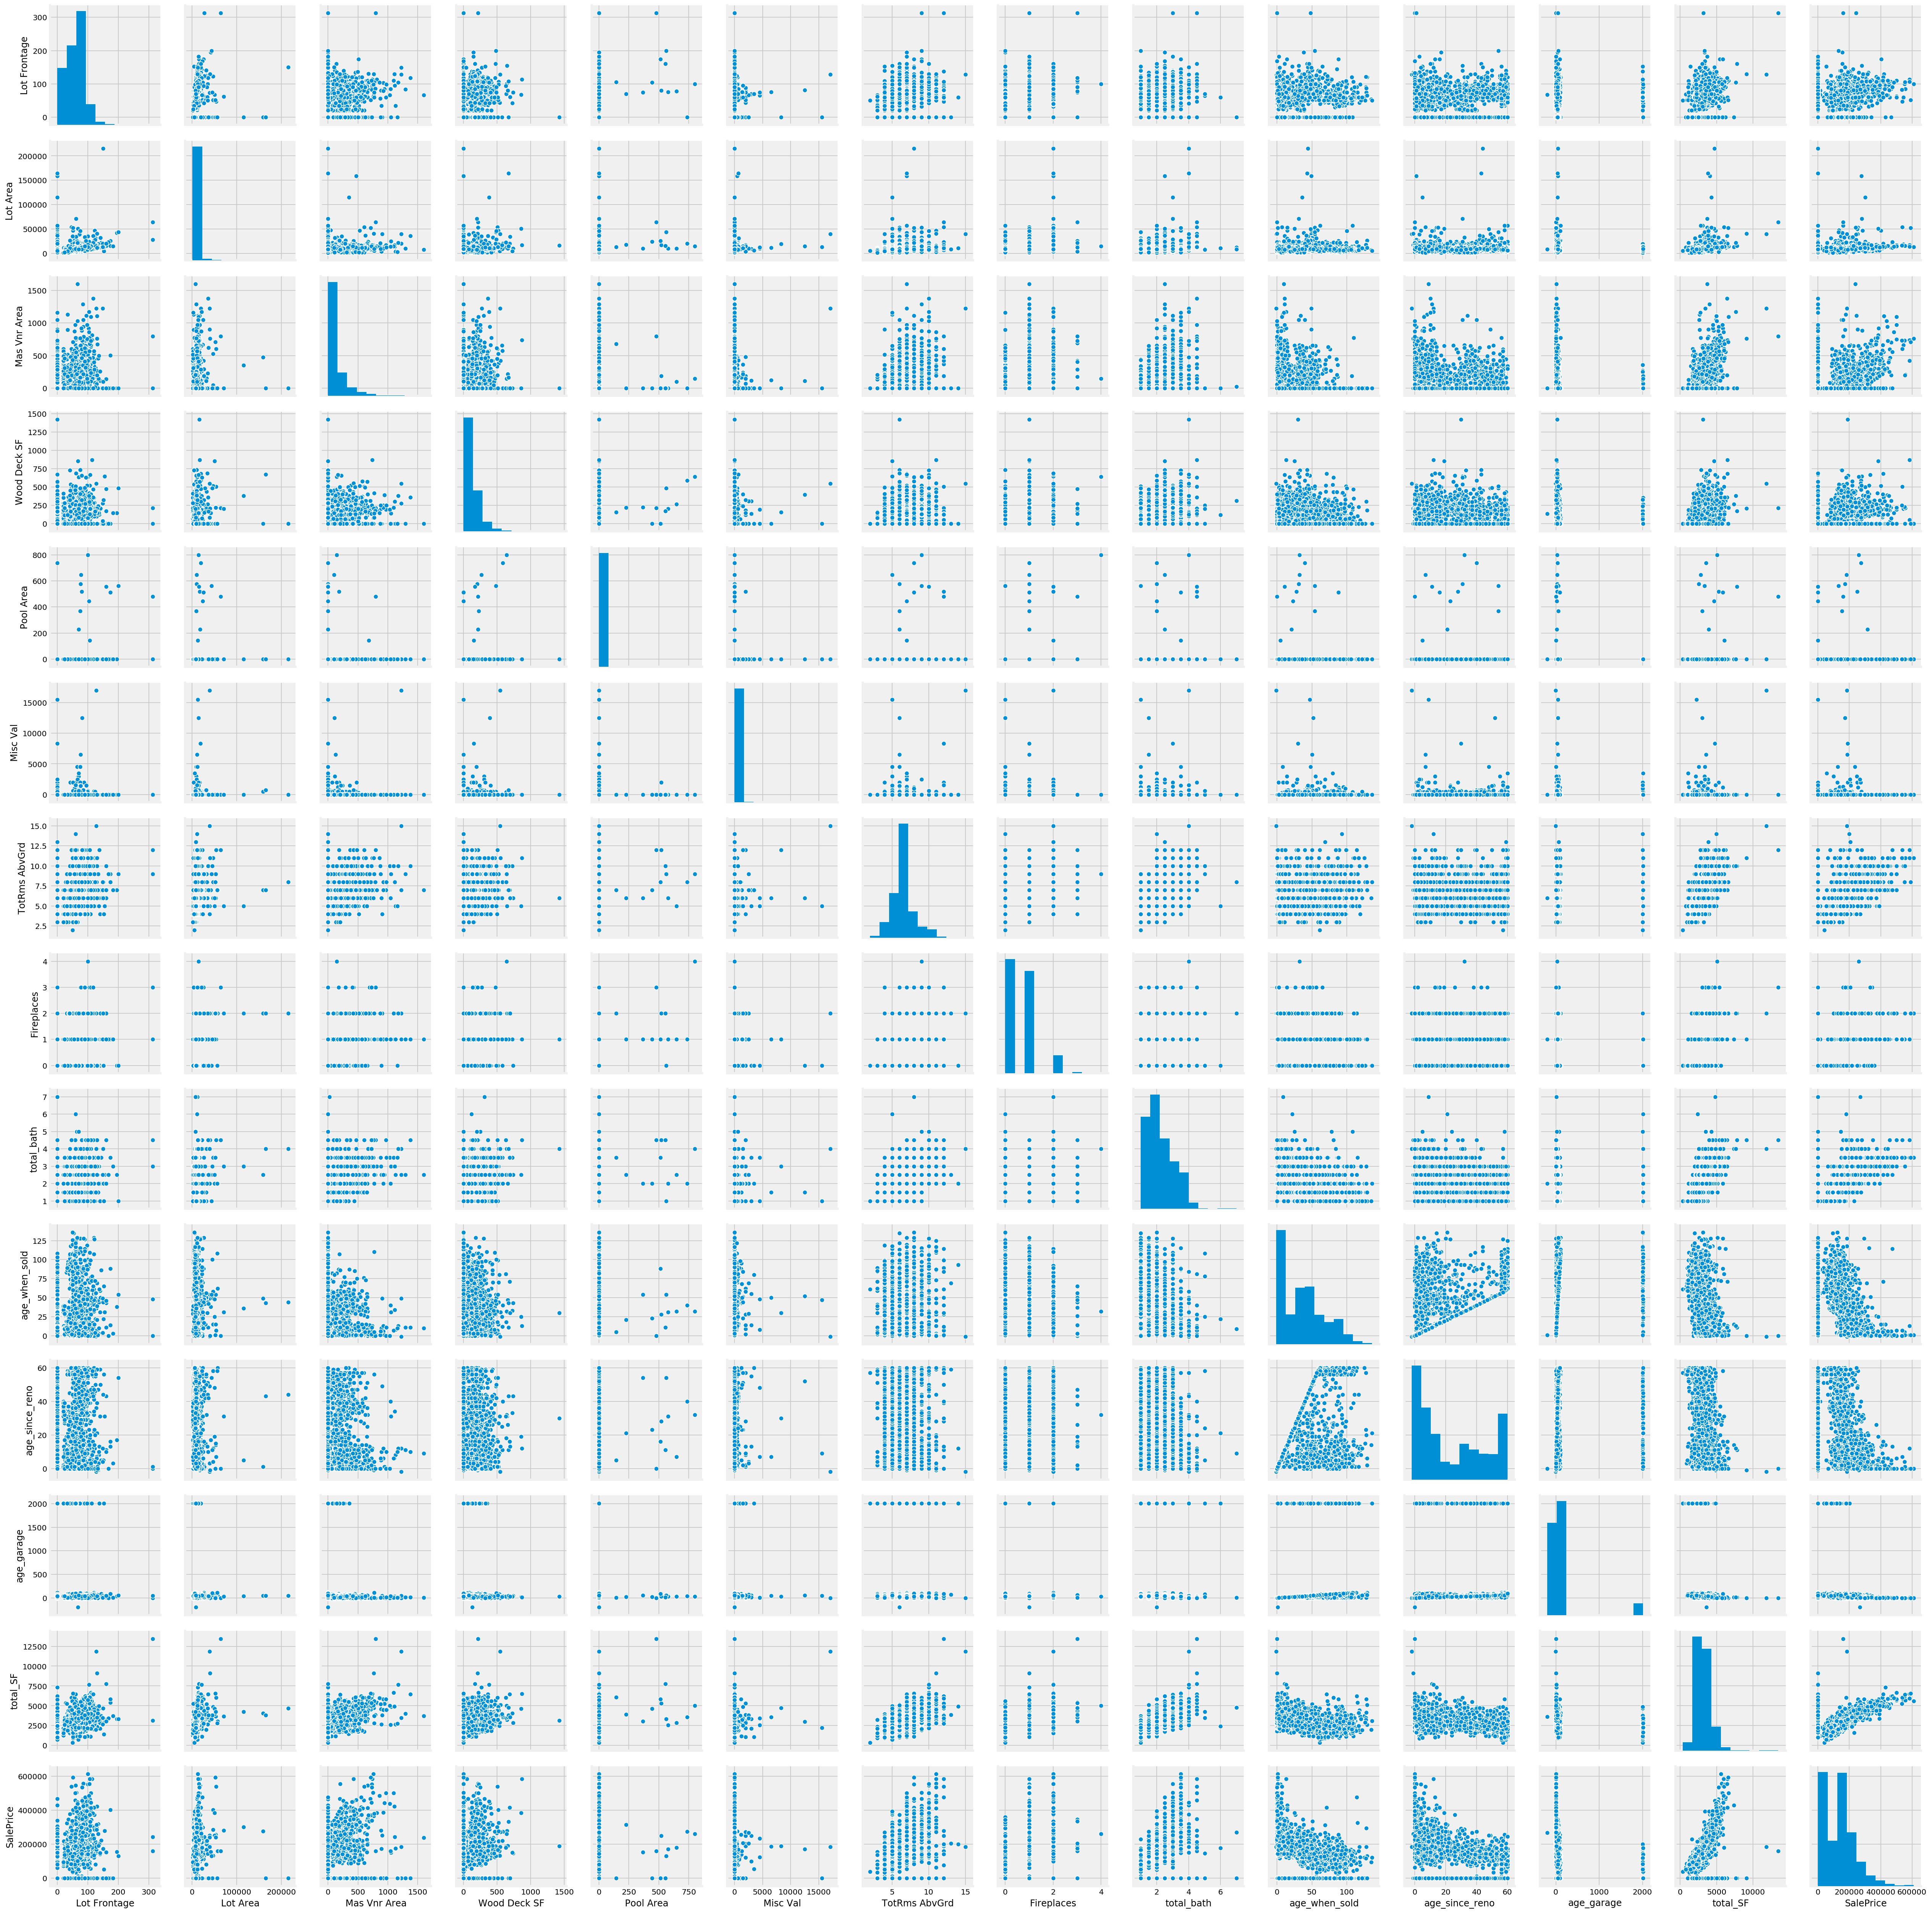

In [39]:
#pairplots for only continous/discr variables and DV
ax=sns.pairplot(ames[conti_var]) 

Pairplots were plotted for continuous, discrete and ordinal variables. 

Pairplots seem to show TotRms AbvGrd, Garage area, Gr liv area as possible normal distributions. The other variables are highly skewed or discrete. SalePrice (DV, dependent variable) is positively skewed. I will log transform the DV to make DV more normally distributed. 

We see some variables correlating with each other, as above. The IV's seem to fit a linear combination of the DV except total_SF. Thus, a Multiple Linear Regression will be the choice of analysis. 

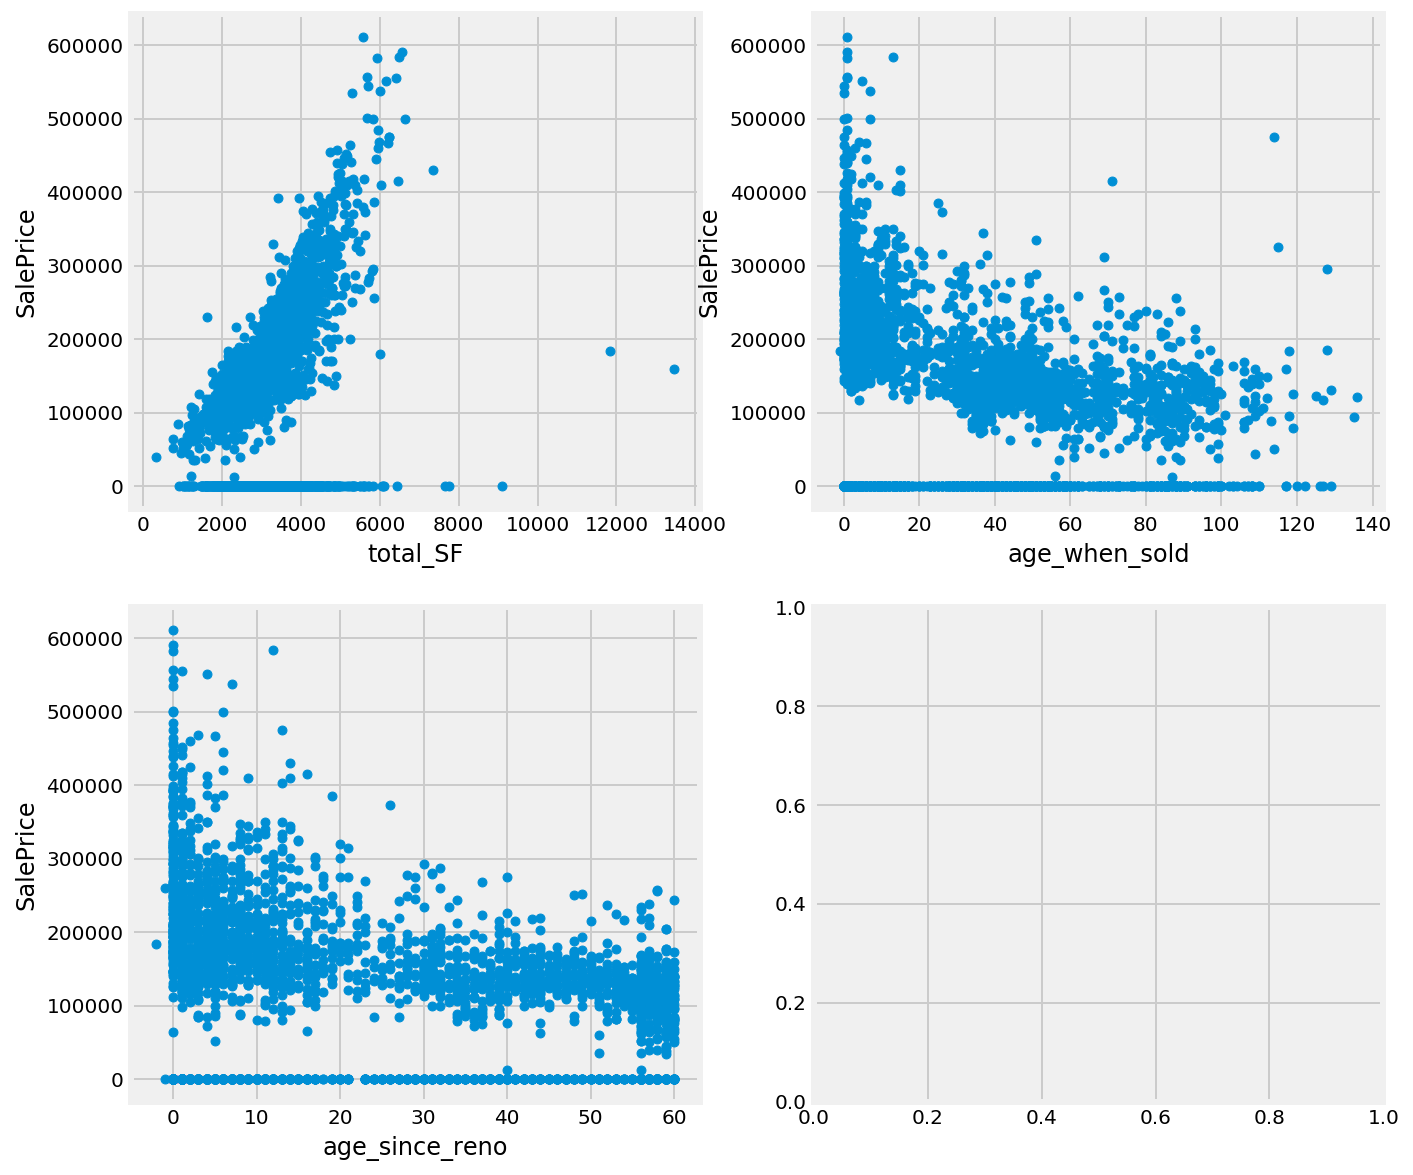

In [40]:
#seem to be quadratic 
fig, axes = plt.subplots(2,2, figsize=(10,10))


ames.plot(x="total_SF", y="SalePrice", kind="scatter", ax=axes[0][0])
ames.plot(x='age_when_sold', y="SalePrice", kind="scatter", ax=axes[0][1])
ames.plot(x='age_since_reno', y="SalePrice", kind="scatter", ax=axes[1][0])



In [41]:
#create a quadratic term for total_sf
ames['total_SF_sq']= ames['total_SF']*ames['total_SF']
ames['age_when_sold_sq']= ames['age_when_sold']*ames['age_when_sold']



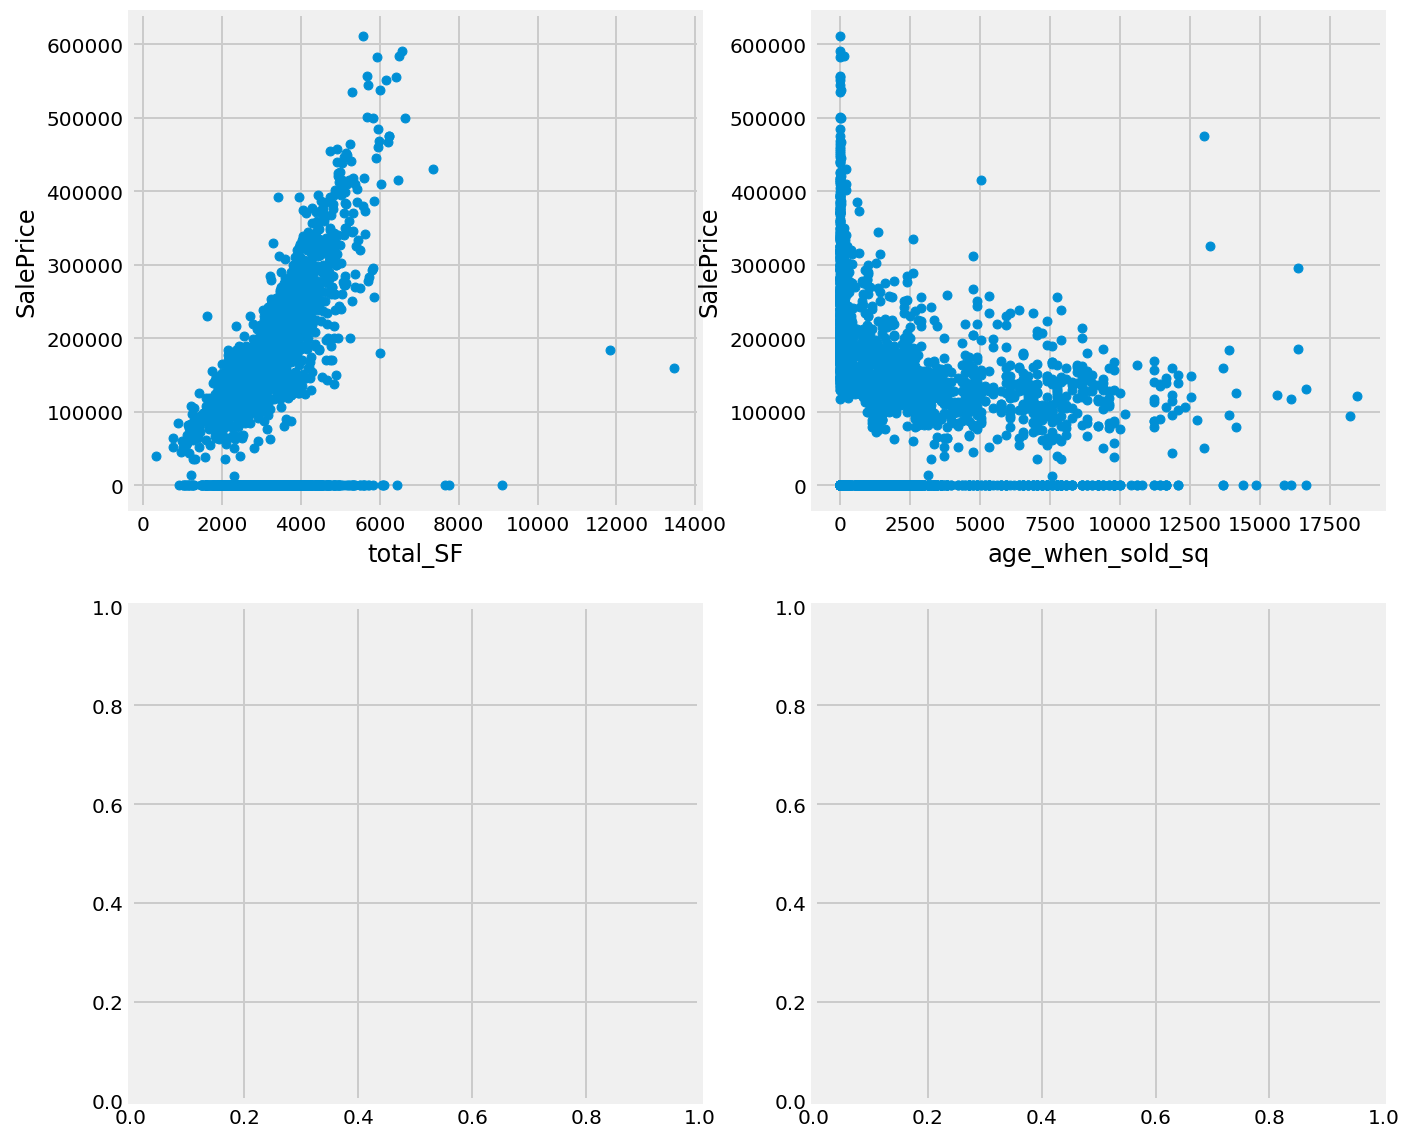

In [46]:
#looks like a function of saleprice
fig, axes = plt.subplots(2,2, figsize=(10,10))


ames.plot(x="total_SF", y="SalePrice", kind="scatter", ax=axes[0][0])
ames.plot(x='age_when_sold_sq', y="SalePrice", kind="scatter", ax=axes[0][1])


In [47]:
conti_var.append("total_SF_sq")
conti_var.append("age_when_sold_sq")

conti_var

['Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'Wood Deck SF',
 'Pool Area',
 'Misc Val',
 'TotRms AbvGrd',
 'Fireplaces',
 'total_bath',
 'age_when_sold',
 'age_since_reno',
 'age_garage',
 'total_SF',
 'SalePrice',
 'total_SF_sq',
 'age_when_sold_sq']

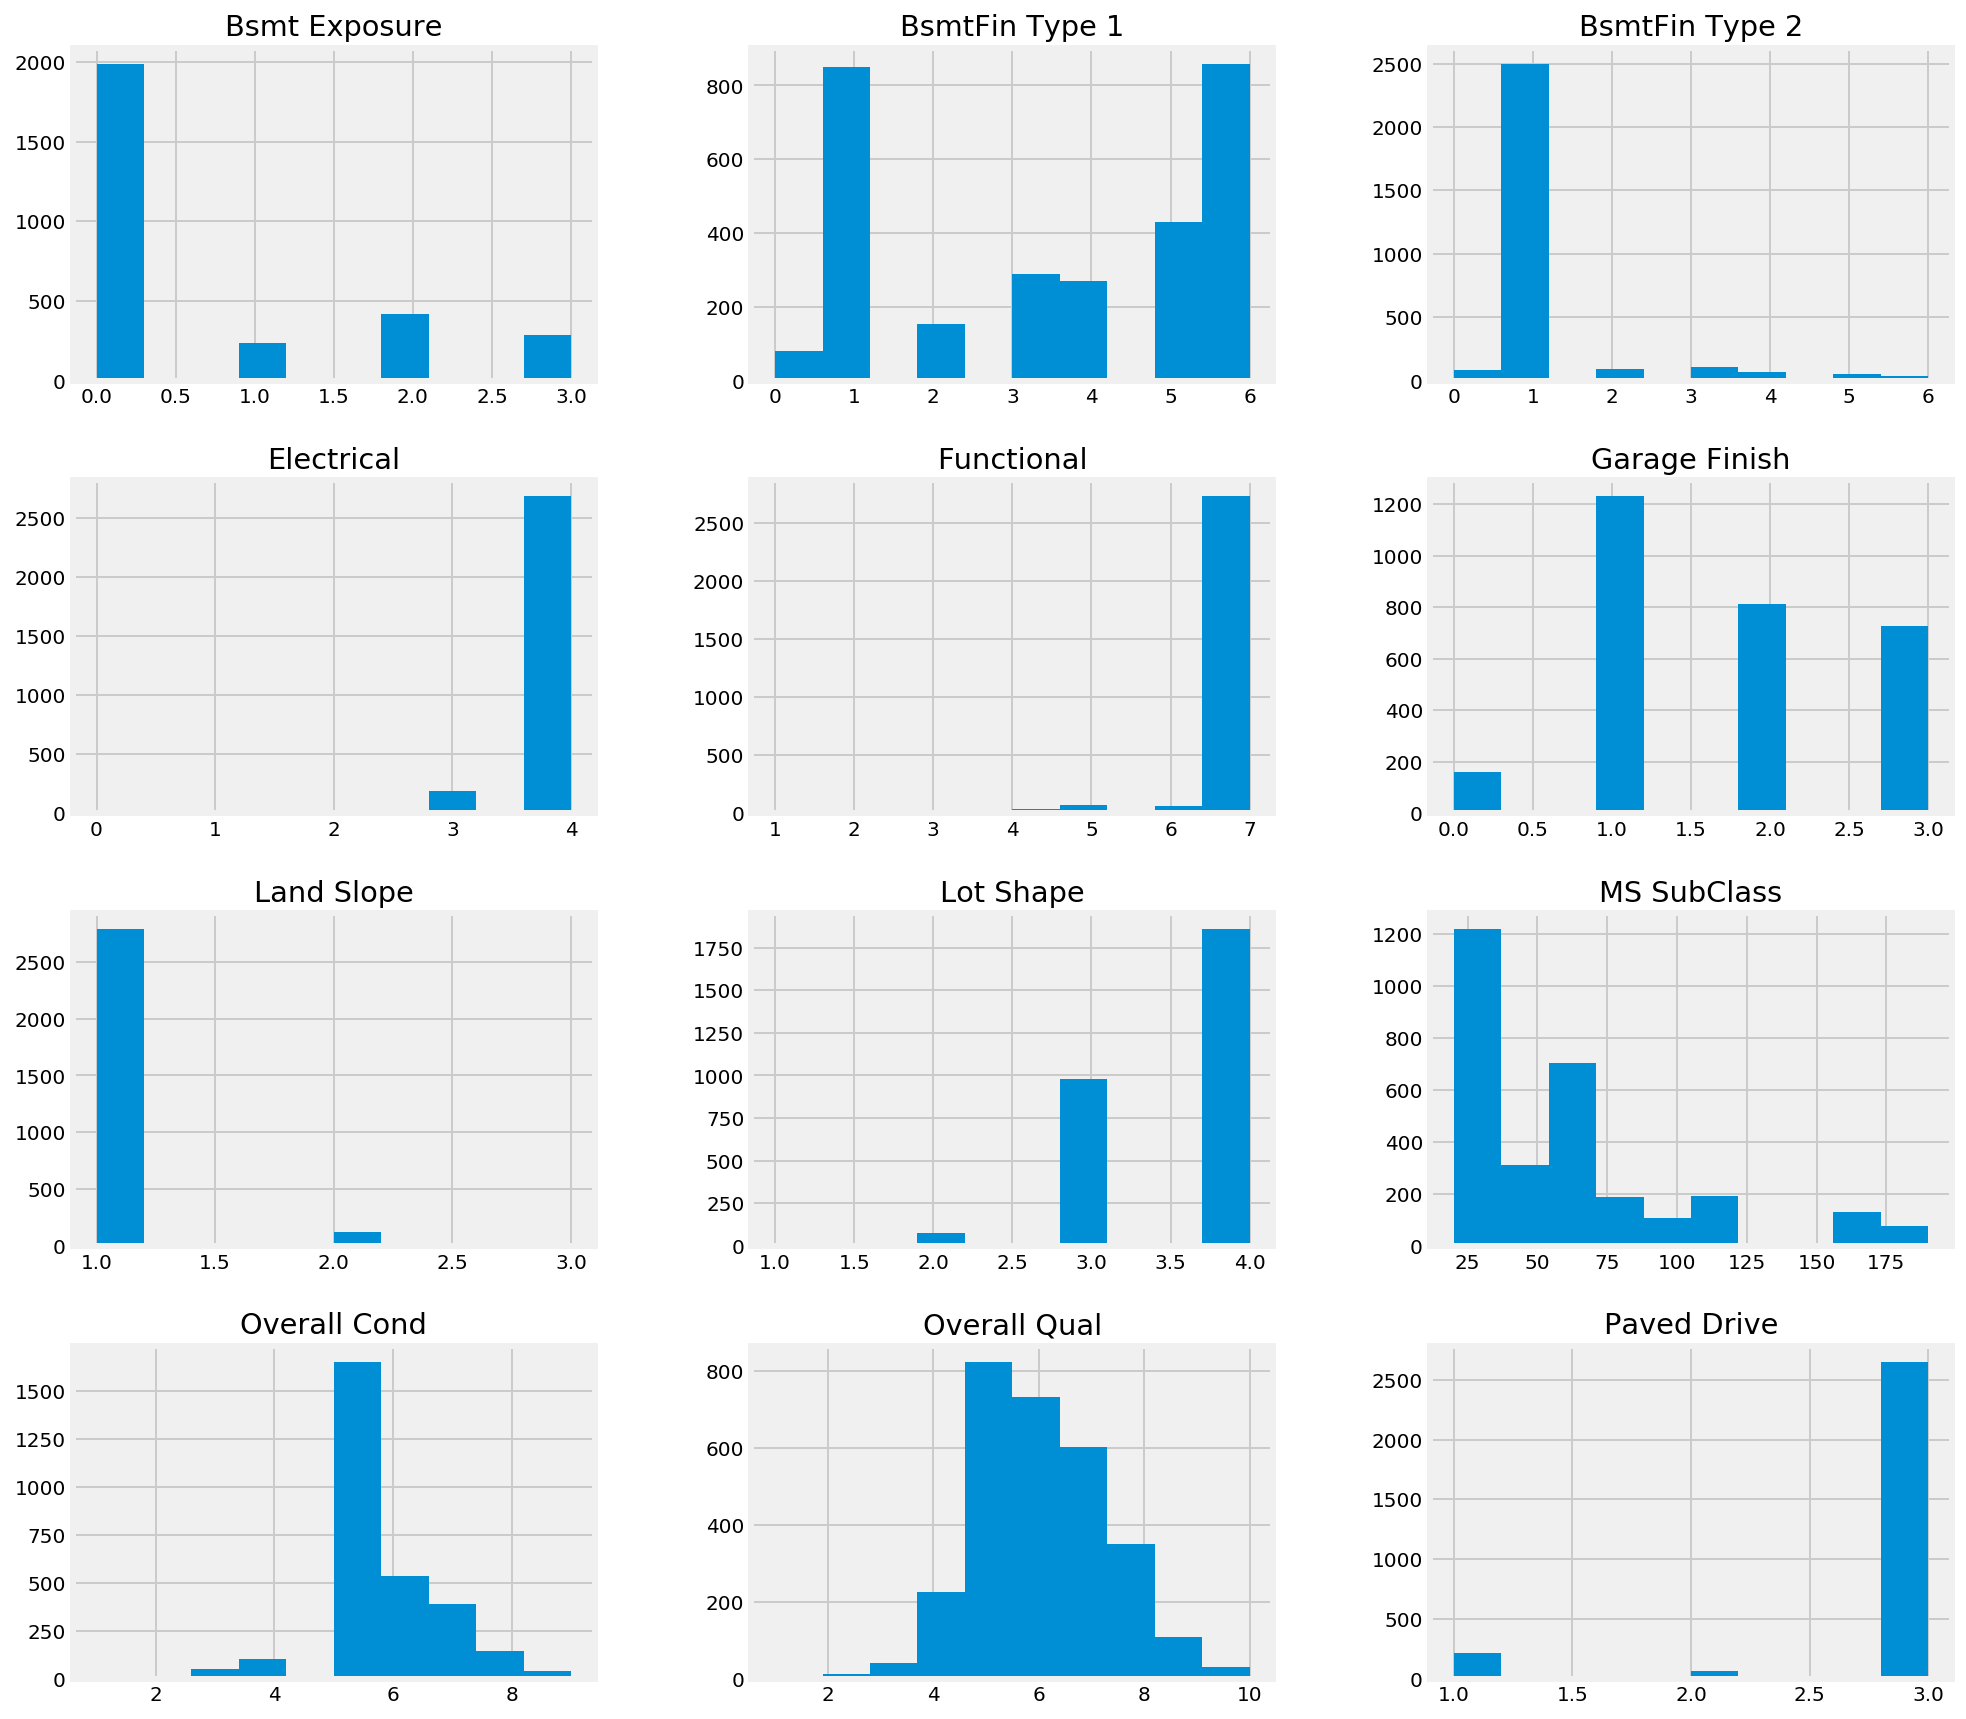

In [48]:
#hist plots of all the ordinal var 
#No point plotting discrete and ordinal data out as it will just look like distinct lines. 
ames[ord_var].hist(figsize=(15,15));

Historgrams were plotted for all ordinal variables. 

Most of the variables have no clear pattern of distribution, Some variables have a skewed distribution. The vriable "Overall Qual" looks like a normal distribution. 



In [49]:
#take all the conti variables and concat them into a new df 


ames_conti_combine = pd.concat([ames[ord_var], ames[conti_var]], axis=1)
ames_conti_combine.head()

Lot Shape  Land Slope  Bsmt Exposure  BsmtFin Type 1  BsmtFin Type 2  \
0          3           1              0               6               1   
1          3           1              0               6               1   
2          4           1              0               6               1   
3          4           1              0               1               1   
4          3           1              0               1               1   

   Electrical  Functional  Garage Finish  Paved Drive  Overall Cond  ...  \
0         4.0         7.0              2            3             8  ...   
1         4.0         7.0              2            3             5  ...   
2         4.0         7.0              1            3             7  ...   
3         4.0         7.0              3            3             5  ...   
4         4.0         7.0              1            1             8  ...   

   TotRms AbvGrd  Fireplaces  total_bath  age_when_sold  age_since_reno  \
0              6           0         2.5             34               5   
1              8           1         3.5             13              12   
2              5           0         2.0             57               3   
3              7           0         2.5              4               3   
4              6           0         2.0            110              17   

   age_garage  total_SF  SalePrice  total_SF_sq  age_when_sold_sq  
0        34.0    2723.0   130500.0    7414729.0              1156  
1        12.0    3668.0   220000.0   13454224.0               169  
2        57.0    2412.0   109000.0    5817744.0              3249  
3         3.0    2228.0   174000.0    4963984.0                16  
4        53.0    2664.0   138500.0    7096896.0             12100  

[5 rows x 28 columns]

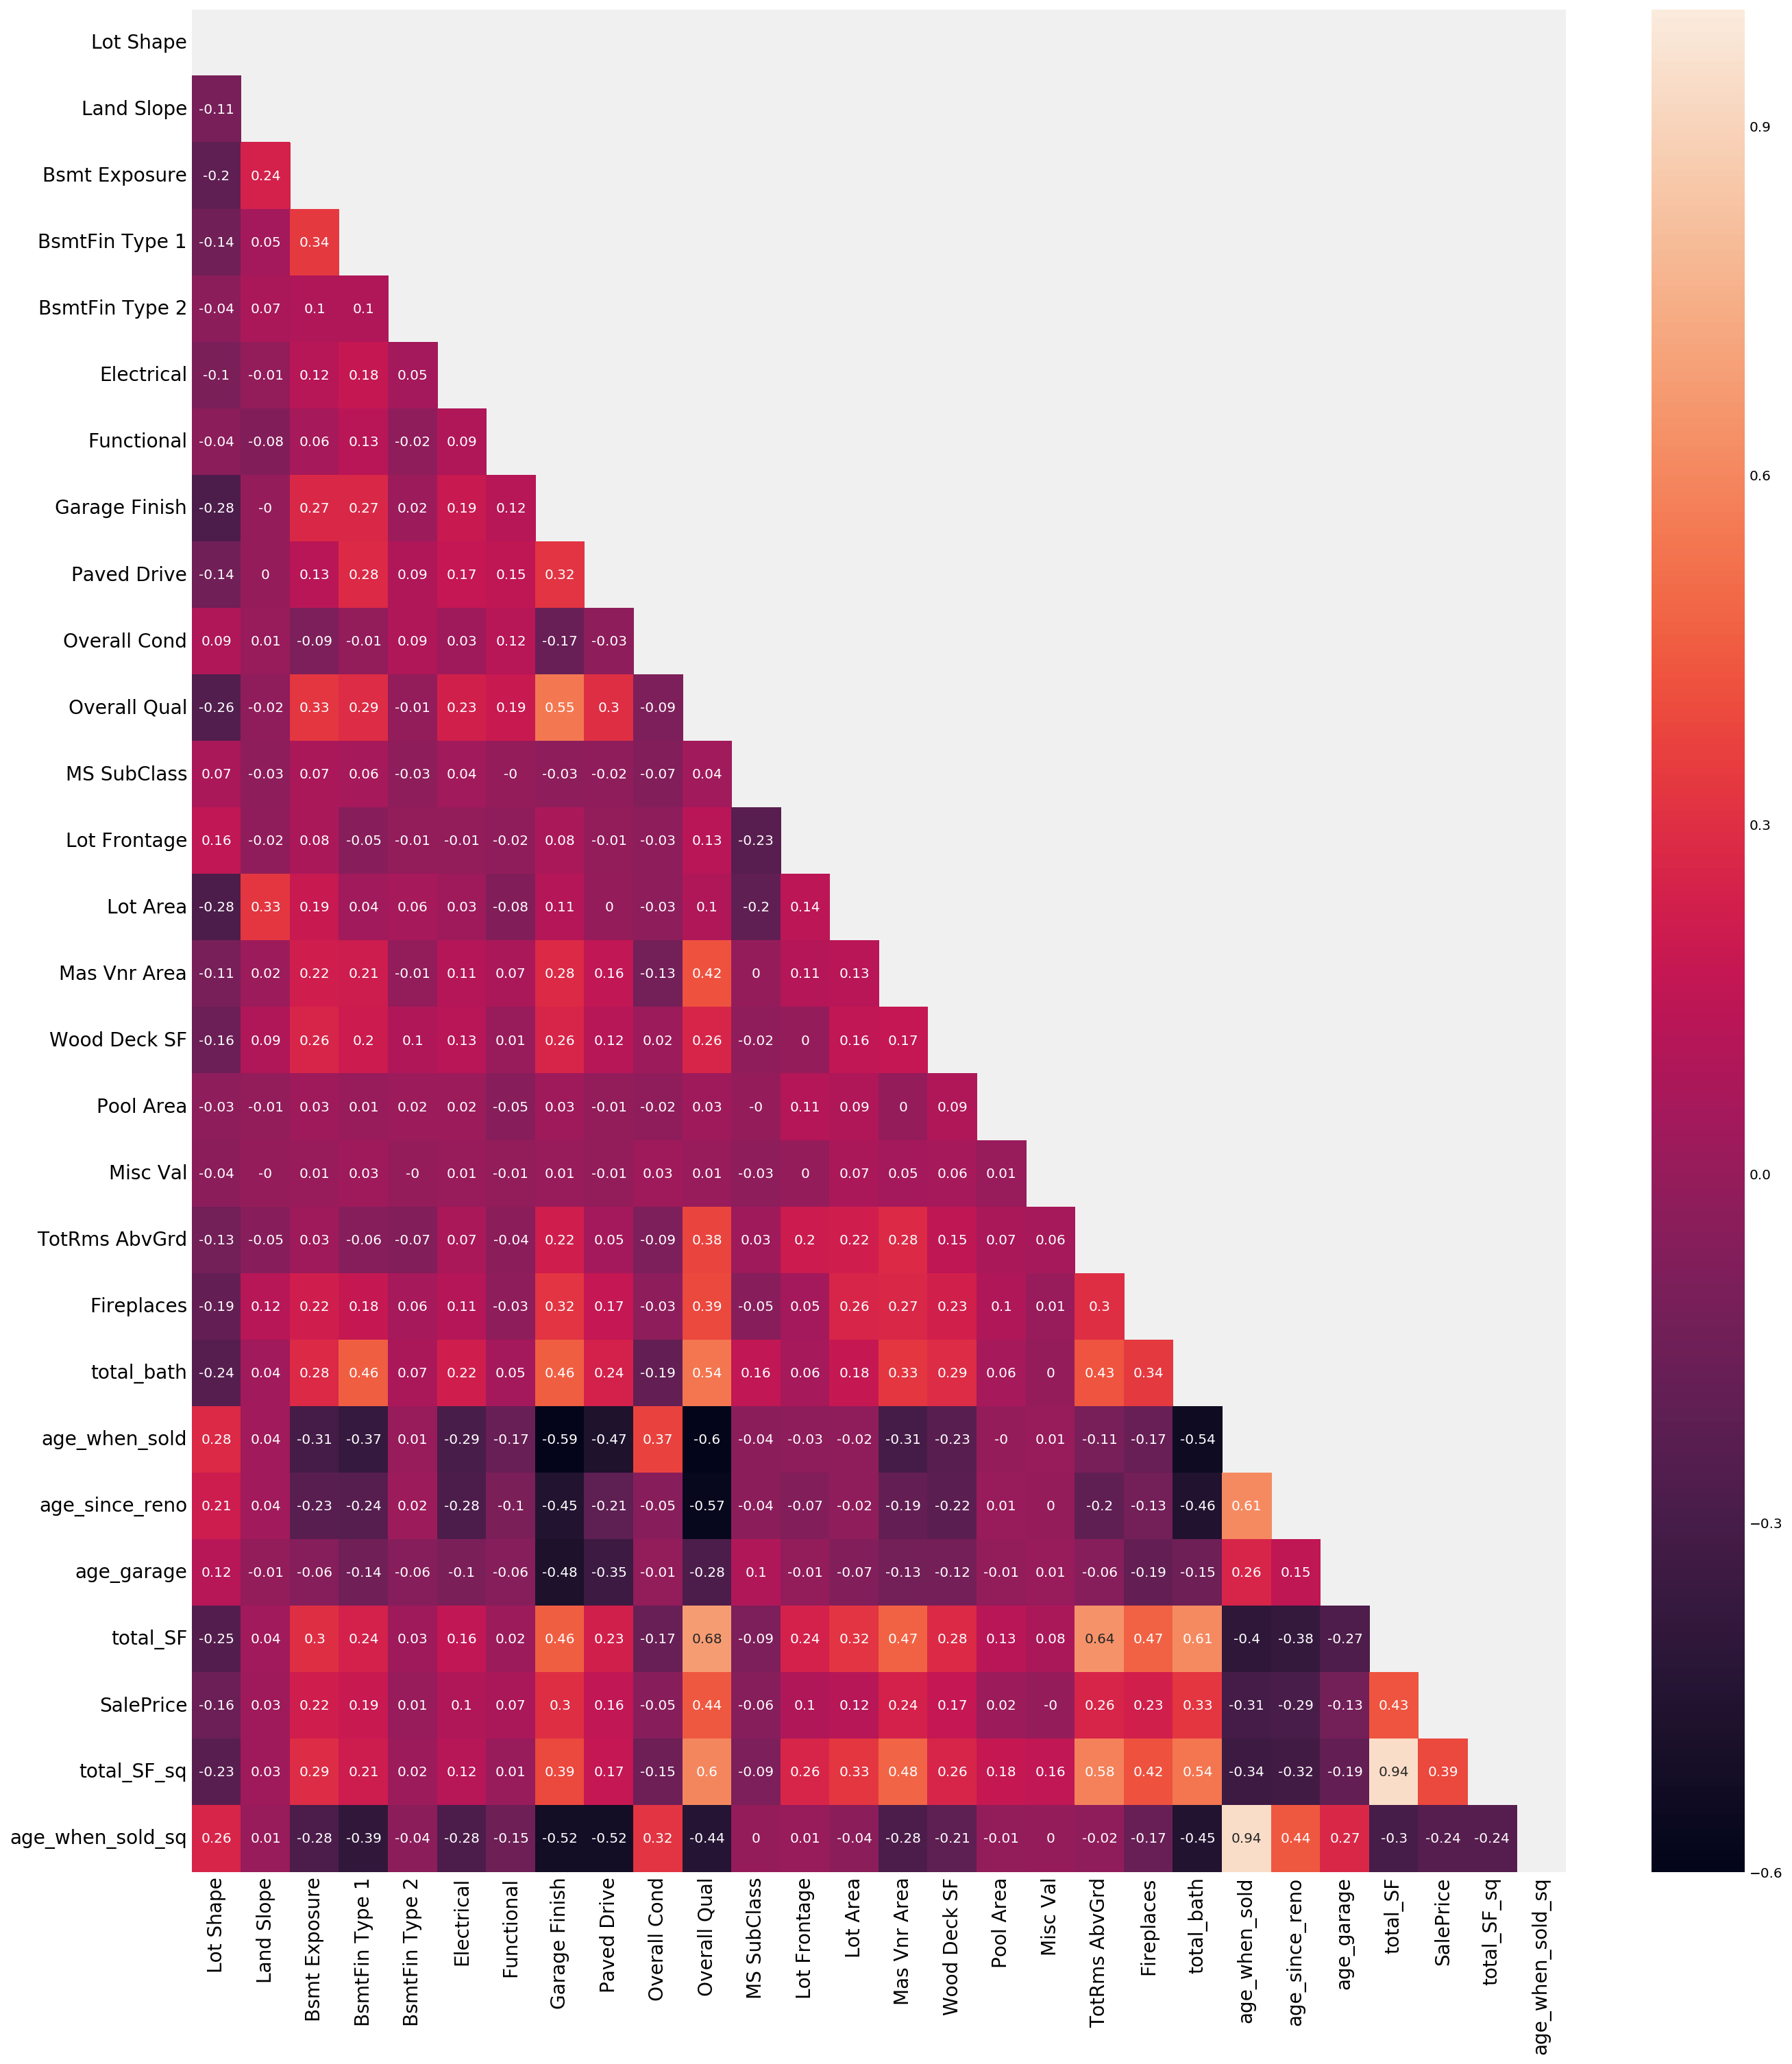

In [50]:

ames_conti_corr=round(ames_conti_combine.corr(),2)

# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(20,25))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(ames_conti_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  #triu triangle upper

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(ames_conti_corr,mask=mask, ax=ax, annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, va="center")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

Heatmap was plotted for continuous, discrete and ordinal variables.

Overall, there are some variables correlaing strongly with each other such as Garage finish and age_when_sold. There are also variables that have zero correlations with each other when rounded to 2 decimal places such as Misc Val and Lot frontage. 

At a glance, it doesnt seem like there are stong correlations to the DV. 

### Norminal/Binary

In [51]:
#list of all norminal/binary var

nb_var=['House Style', 'Lot Config', 'Street','Heating', 
        'Foundation', 'Land Contour', 'Condition 1',
        'Condition 2','Roof Style', 'Neighborhood', 
        'MS Zoning','Exterior 1st', 'Exterior 2nd', 
        'Central Air','Mas Vnr Type', 'Sale Type',
        'Bldg Type', 'Roof Matl', 'Garage Type']

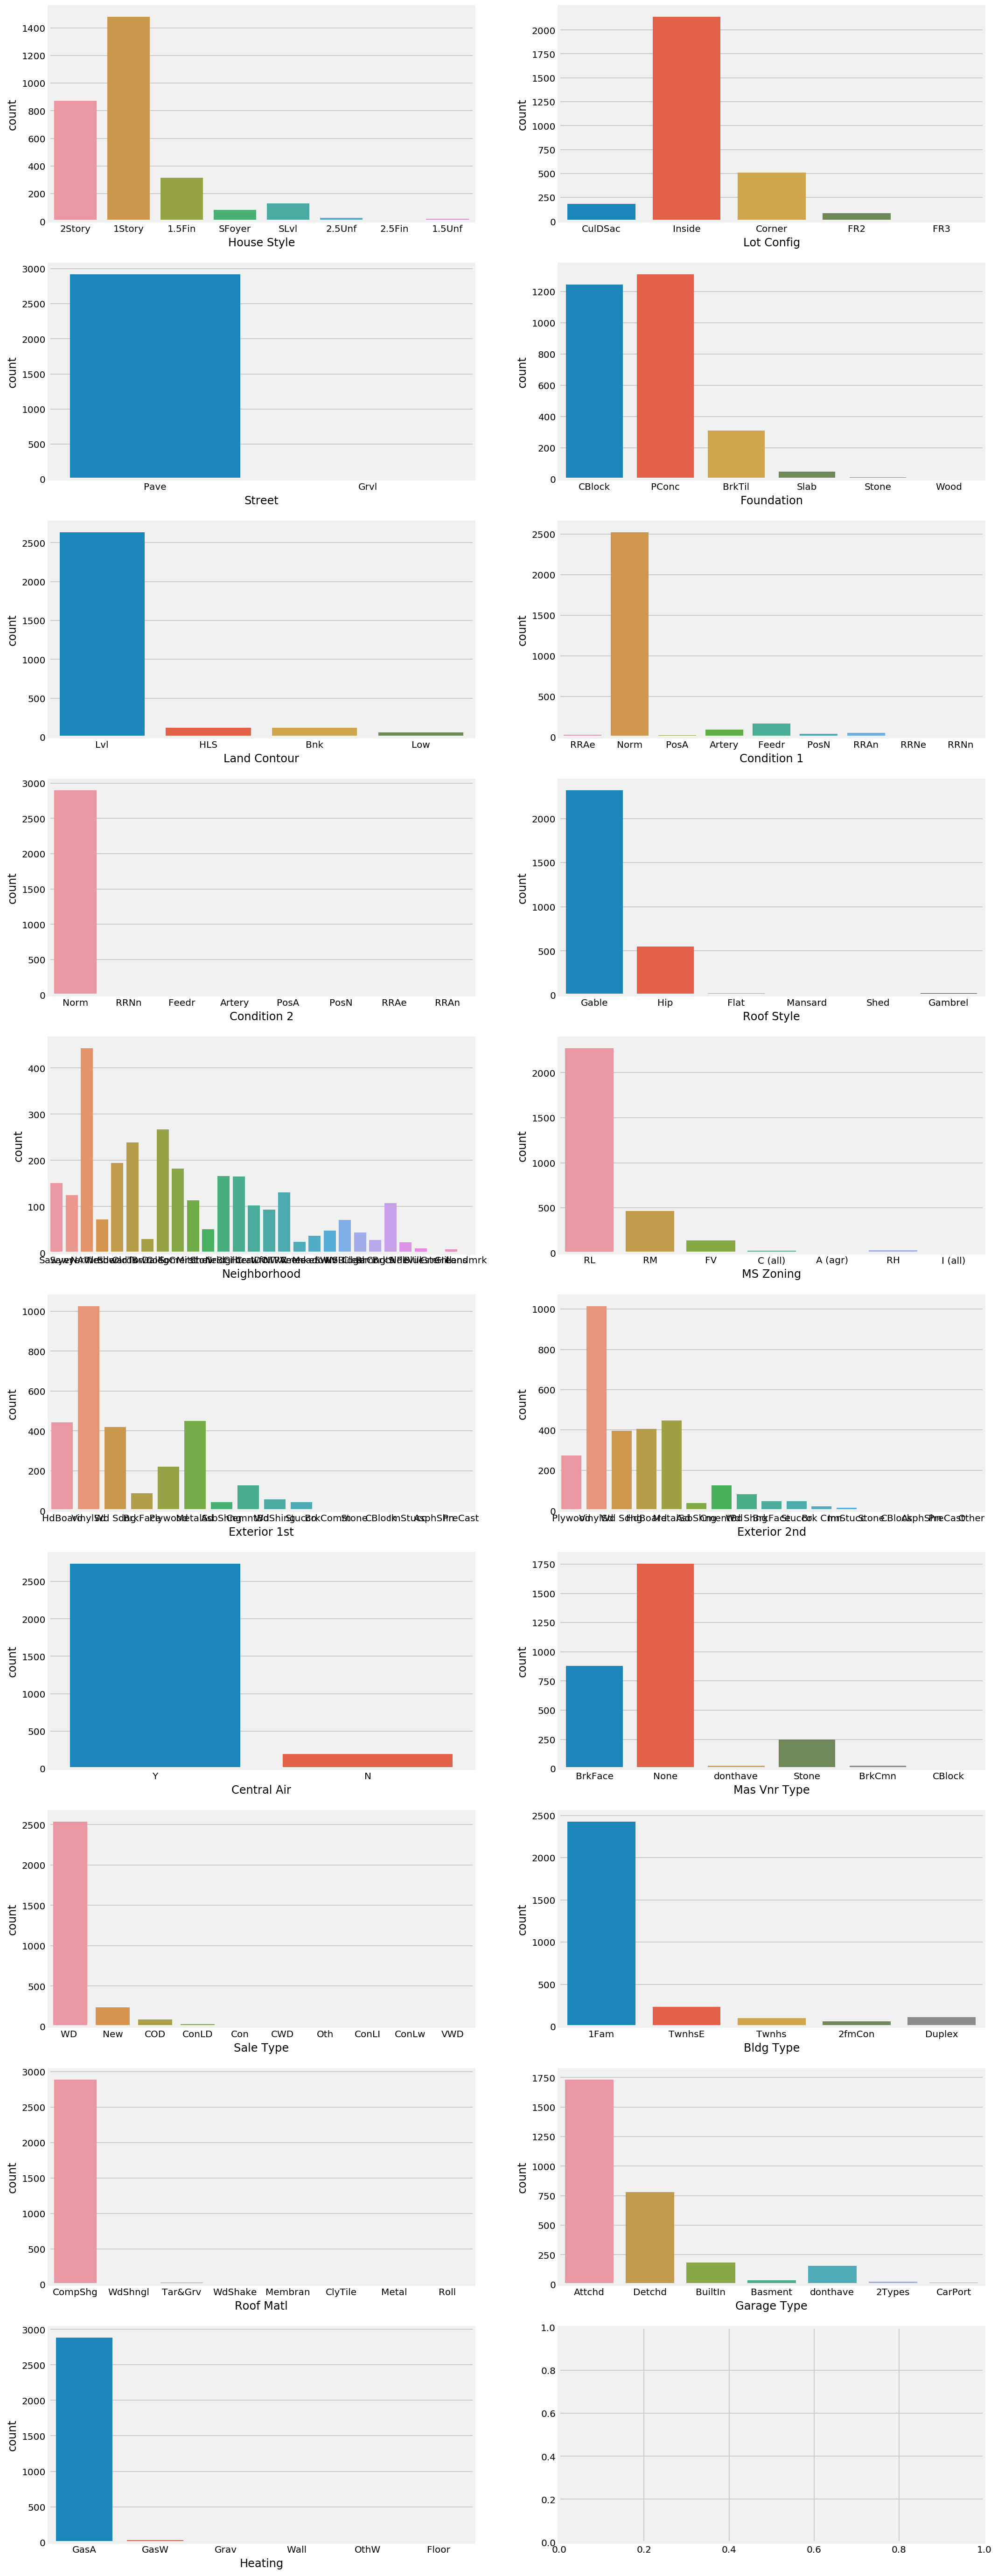

In [52]:
#freq dist of norm/bi var

fig, axes = plt.subplots(10,2, figsize=(16,50))

sns.countplot(data = ames, x = 'House Style', ax=axes[0][0])
sns.countplot(data = ames, x = 'Lot Config', ax=axes[0][1])
sns.countplot(data = ames, x = 'Street', ax=axes[1][0])
sns.countplot(data = ames, x = 'Foundation', ax=axes[1][1])
sns.countplot(data = ames, x = 'Land Contour', ax=axes[2][0])
sns.countplot(data = ames, x = 'Condition 1', ax=axes[2][1])
sns.countplot(data = ames, x = 'Condition 2', ax=axes[3][0])
sns.countplot(data = ames, x = 'Roof Style', ax=axes[3][1])
sns.countplot(data = ames, x = 'Neighborhood', ax=axes[4][0])
sns.countplot(data = ames, x = 'MS Zoning', ax=axes[4][1])
sns.countplot(data = ames, x = 'Exterior 1st', ax=axes[5][0])
sns.countplot(data = ames, x = 'Exterior 2nd', ax=axes[5][1])
sns.countplot(data = ames, x = 'Central Air', ax=axes[6][0])
sns.countplot(data = ames, x = 'Mas Vnr Type', ax=axes[6][1])
sns.countplot(data = ames, x = 'Sale Type', ax=axes[7][0])
sns.countplot(data = ames, x = 'Bldg Type', ax=axes[7][1])
sns.countplot(data = ames, x = 'Roof Matl', ax=axes[8][0])
sns.countplot(data = ames, x = 'Garage Type', ax=axes[8][1])
sns.countplot(data = ames, x = 'Heating', ax=axes[9][0])



for i in nb_var:
    print (ames[i].value_counts())
    print ('--------------------')


The frequency plots of all norminal and binary variables show us the count of each values in the variable. 
We can certainly see that some features within the variables are more popular than others. 
For instance, in House Style, 1story is the most popular. 


Some of the variables have very few counts in some categories. For instance, Street which have 2043 Pave but only 7 in Grvl. This makes the variable useless as the disparity between categories are too large. Some features such as mansory is very rare and have a lot more people who do not have it than have it will also be dropped. These variables will be dropped: Street, Condition 2,  Roof Matl. 


?????????????????For some variables, I will merge the lowest few (in counts) categories into a categoy called others, instead of keeping many small categories that may affect predictions later on. This also reduces the number of dummy variables' category. As dummy variables have to be one-hot encoded, i will drop the "others" category. As exterior is already been accounted for by Overall quality and condition, it will also be dropped. 

In [53]:
ames.drop(["Street", "Condition 2", "Roof Matl"], axis=1, inplace=True)


In [54]:
ames.shape

(2930, 47)

In [55]:
remove = "Street", "Condition 2", "Roof Matl"
for i in remove:
    nb_var.remove(i)
    
nb_var

['House Style',
 'Lot Config',
 'Heating',
 'Foundation',
 'Land Contour',
 'Condition 1',
 'Roof Style',
 'Neighborhood',
 'MS Zoning',
 'Exterior 1st',
 'Exterior 2nd',
 'Central Air',
 'Mas Vnr Type',
 'Sale Type',
 'Bldg Type',
 'Garage Type']

In [56]:
#get dummies for norm/bi var

dummy_df = pd.get_dummies(ames[nb_var], drop_first=True)
(list(dummy_df.columns))


['House Style_1.5Unf',
 'House Style_1Story',
 'House Style_2.5Fin',
 'House Style_2.5Unf',
 'House Style_2Story',
 'House Style_SFoyer',
 'House Style_SLvl',
 'Lot Config_CulDSac',
 'Lot Config_FR2',
 'Lot Config_FR3',
 'Lot Config_Inside',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'Land Contour_HLS',
 'Land Contour_Low',
 'Land Contour_Lvl',
 'Condition 1_Feedr',
 'Condition 1_Norm',
 'Condition 1_PosA',
 'Condition 1_PosN',
 'Condition 1_RRAe',
 'Condition 1_RRAn',
 'Condition 1_RRNe',
 'Condition 1_RRNn',
 'Roof Style_Gable',
 'Roof Style_Gambrel',
 'Roof Style_Hip',
 'Roof Style_Mansard',
 'Roof Style_Shed',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Greens',
 'Neighb

#dropping one col for each dummy var as one-hot encoding


drop_for_onehot= ['House Style_SFoyer', 'House Style_2.5Fin', 'House Style_2.5Unf', 'House Style_1.5Fin',
                  'Lot Config_FR2', 'Lot Config_FR3','Foundation_BrkTil', 'Foundation_CBlock','Foundation_PConc',
                  'Land Contour_Low','Roof Style_Gambrel','Roof Style_Mansard','Roof Style_Shed',
                  'Neighborhood_Blueste','Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_Landmrk',
                  'Sale Type_COD','Sale Type_CWD', 'Sale Type_Con','Sale Type_ConLD','Sale Type_ConLI','Sale Type_ConLw',
                  'Sale Type_New','Sale Type_Oth','Bldg Type_2fmCon', 'Garage Type_2Types', 'Garage Type_Basment', 'Garage Type_CarPort'
]

dummy_df.drop(drop_for_onehot, axis=1, inplace=True)

 

In [57]:
nb_var

['House Style',
 'Lot Config',
 'Heating',
 'Foundation',
 'Land Contour',
 'Condition 1',
 'Roof Style',
 'Neighborhood',
 'MS Zoning',
 'Exterior 1st',
 'Exterior 2nd',
 'Central Air',
 'Mas Vnr Type',
 'Sale Type',
 'Bldg Type',
 'Garage Type']

In [58]:
ames.drop(nb_var, axis=1, inplace=True)

In [59]:
ames_with_dummy = pd.concat([ames, dummy_df])

In [60]:
for col in ames_with_dummy:
    if ames_with_dummy[col].dtype == "int64" or "float64":
        ames_with_dummy[col].fillna(value=0, inplace=True)
    else:
        pass

In [61]:
ames_with_dummy.head()

Id          PID  MS SubClass  Lot Frontage  Lot Area  Lot Shape  \
0  109.0  533352170.0         60.0           0.0   13517.0        3.0   
1  544.0  531379050.0         60.0          43.0   11492.0        3.0   
2  153.0  535304180.0         20.0          68.0    7922.0        4.0   
3  318.0  916386060.0         60.0          73.0    9802.0        4.0   
4  255.0  906425045.0         50.0          82.0   14235.0        3.0   

   Land Slope  Overall Qual  Overall Cond  Mas Vnr Area  ...  \
0         1.0           6.0           8.0         289.0  ...   
1         1.0           7.0           5.0         132.0  ...   
2         1.0           5.0           7.0           0.0  ...   
3         1.0           5.0           5.0           0.0  ...   
4         1.0           6.0           8.0           0.0  ...   

   Bldg Type_2fmCon  Bldg Type_Duplex  Bldg Type_Twnhs  Bldg Type_TwnhsE  \
0               0.0               0.0              0.0               0.0   
1               0.0               0.0              0.0               0.0   
2               0.0               0.0              0.0               0.0   
3               0.0               0.0              0.0               0.0   
4               0.0               0.0              0.0               0.0   

   Garage Type_Attchd  Garage Type_Basment  Garage Type_BuiltIn  \
0                 0.0                  0.0                  0.0   
1                 0.0                  0.0                  0.0   
2                 0.0                  0.0                  0.0   
3                 0.0                  0.0                  0.0   
4                 0.0                  0.0                  0.0   

   Garage Type_CarPort  Garage Type_Detchd  Garage Type_donthave  
0                  0.0                 0.0                   0.0  
1                  0.0                 0.0                   0.0  
2                  0.0                 0.0                   0.0  
3                  0.0                 0.0                   0.0  
4                  0.0                 0.0                   0.0  

[5 rows x 157 columns]

## split away the test data from train data

In [62]:
train_df = ames_with_dummy[ames_with_dummy['data_from']=='train']
final_test_df = ames_with_dummy[ames_with_dummy['data_from']=='test']


## Feature selection


For selection fo features, I have opt for a backward elimination method first. It will force all variables into a regression model and I will manually eleminate variables if they do not individually predict the DV. This is done by either looking at the $p$-value or by using the confidence interval. 

In [63]:
ivs = list(train_df.columns)

remove_iv = 'Id','PID','SalePrice', 'data_from'
for i in remove_iv:
    ivs.remove(i)
  

In [64]:
#choose x, y 
X=train_df[ivs]
y=np.log(train_df["SalePrice"])

In [65]:
#perform train test split and evaluate

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)  


## MLR 

In [66]:
lr = LinearRegression()

In [67]:
#fit into linear regression and get r2 score

lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8985033321143472

In [68]:

lr.score(X_test, y_test)

0.8689467822712698

In [69]:
#using cross_val_score to see how the model does

kf=KFold(n_splits=10, shuffle=True, random_state=42)
cross_val_score(lr, X, y, cv= kf).mean()

0.8833866395677583

The bias for this model is very low while the variance is not too bad. The test scores and the cross_val_scores seem to show that it is slightly overfitted. Thus, we will use lasso regression to hopefully reduce the number of features further. 



## Optimization

In [70]:
#lasso is chosen because i want to eliminate features not jsut shrink them
#favor parsimony 
#Need to scale before lasso


ss = StandardScaler()
ss.fit(X_train)

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [71]:
%%time
#find the best alpha 
l_alphas = np.arange(0.001, 0.15, 0.0025)

optimal_lasso = LassoCV(alphas=l_alphas, n_alphas=555, cv=10)
optimal_lasso.fit(X_train_sc, y_train)

print (optimal_lasso.alpha_)

0.001
Wall time: 302 ms


In [72]:
#put in the optimal alpha

lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso.fit(X_train_sc, y_train)
lasso.score(X_train_sc, y_train)

0.8978499875011565

In [73]:
lasso.score(X_test_sc, y_test)

0.8702594859668141

In [74]:
cross_val_score(lasso, X_train_sc, y_train, cv=10).mean()

0.8833269933407453

Although the bias have increase slightly but it is clear that the variance is not as high. 

In [75]:
#lasso.coef_

In [76]:
#get the coefs and absolute value of coef and put them into a df and name the columns 
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})


In [77]:
lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
lasso_coefs.head(18)

variable      coef  abs_coef
24        total_SF  0.307051  0.307051
25     total_SF_sq -0.192503  0.192503
5     Overall Qual  0.112680  0.112680
21   age_when_sold -0.055872  0.055872
6     Overall Cond  0.043300  0.043300
22  age_since_reno -0.034204  0.034204
2         Lot Area  0.031372  0.031372
20      total_bath  0.030080  0.030080
14      Fireplaces  0.029756  0.029756
12   TotRms AbvGrd  0.023521  0.023521
13      Functional  0.022147  0.022147
16     Paved Drive  0.019490  0.019490
9   BsmtFin Type 1  0.019373  0.019373
8    Bsmt Exposure  0.014859  0.014859
0      MS SubClass -0.013900  0.013900
7     Mas Vnr Area  0.009637  0.009637
15   Garage Finish  0.009334  0.009334
19        Misc Val -0.009055  0.009055

In [78]:
#how many left after lasso regression

lasso_coefs[lasso_coefs["abs_coef"]>0]

variable      coef  abs_coef
24        total_SF  0.307051  0.307051
25     total_SF_sq -0.192503  0.192503
5     Overall Qual  0.112680  0.112680
21   age_when_sold -0.055872  0.055872
6     Overall Cond  0.043300  0.043300
22  age_since_reno -0.034204  0.034204
2         Lot Area  0.031372  0.031372
20      total_bath  0.030080  0.030080
14      Fireplaces  0.029756  0.029756
12   TotRms AbvGrd  0.023521  0.023521
13      Functional  0.022147  0.022147
16     Paved Drive  0.019490  0.019490
9   BsmtFin Type 1  0.019373  0.019373
8    Bsmt Exposure  0.014859  0.014859
0      MS SubClass -0.013900  0.013900
7     Mas Vnr Area  0.009637  0.009637
15   Garage Finish  0.009334  0.009334
19        Misc Val -0.009055  0.009055
17    Wood Deck SF  0.005921  0.005921
1     Lot Frontage  0.005645  0.005645
4       Land Slope  0.004667  0.004667
3        Lot Shape -0.004595  0.004595
18       Pool Area -0.003362  0.003362
10  BsmtFin Type 2 -0.002029  0.002029
23      age_garage  0.001810  0.001810

## Eval


In [79]:
eva_pred = lasso.predict(X_test_sc)

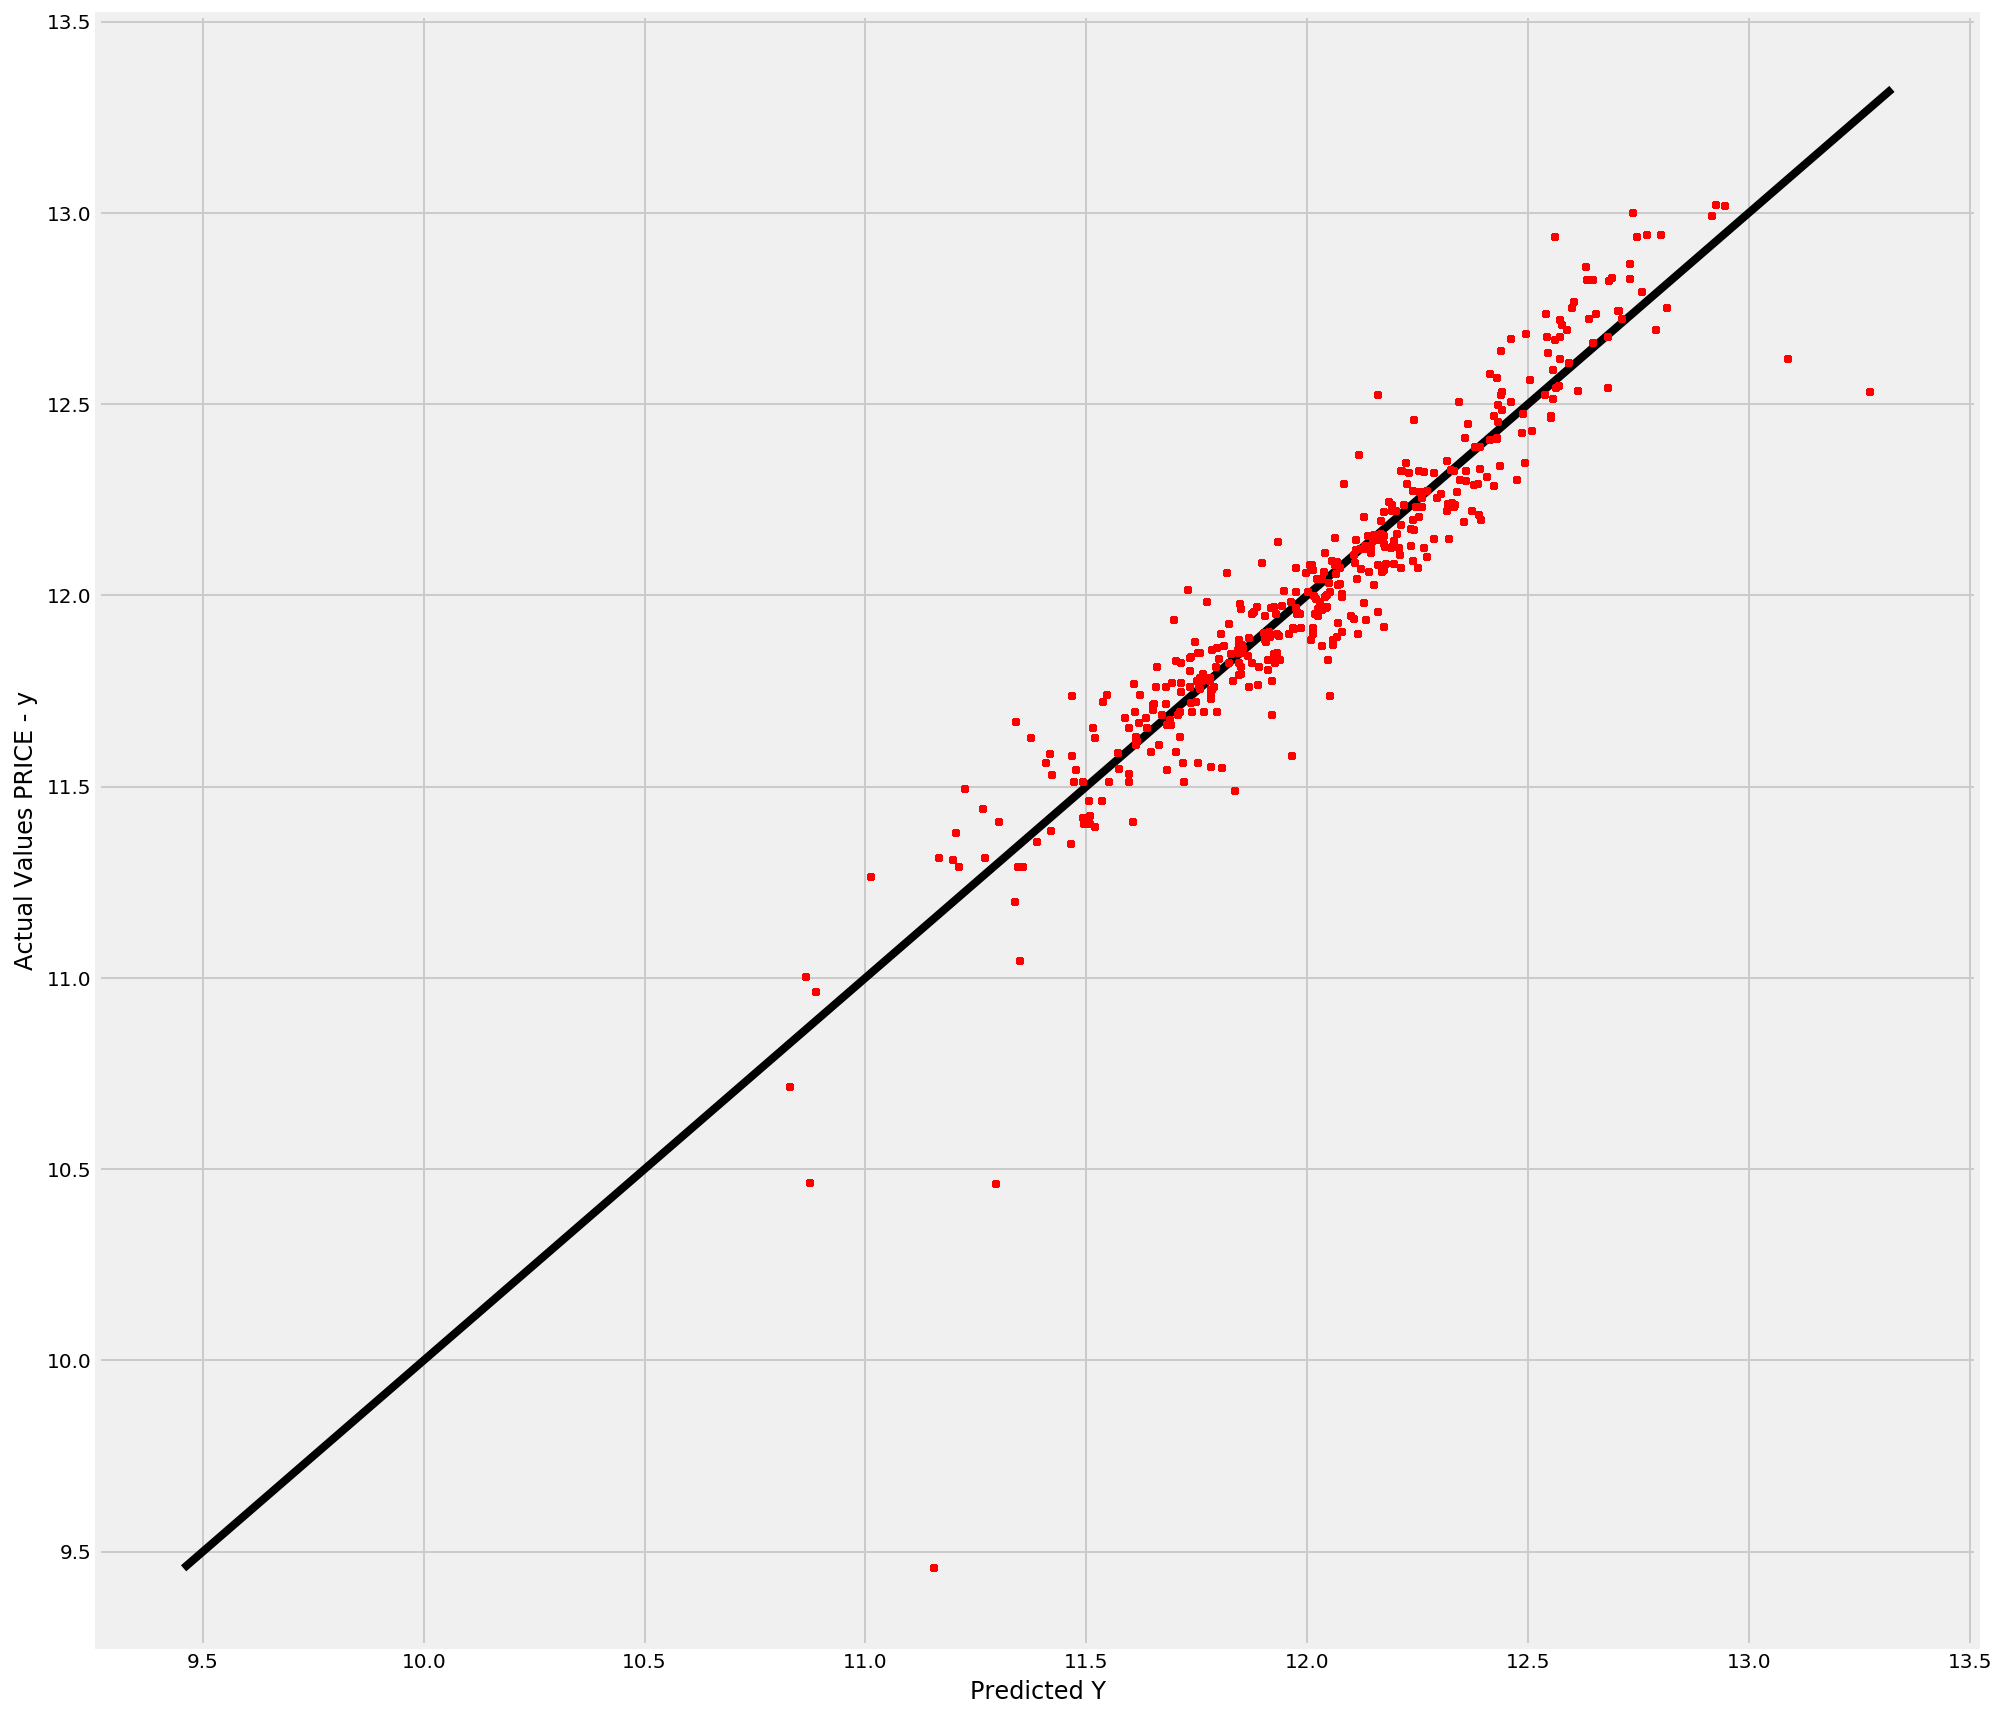

In [99]:
# Plot the model
plt.figure(figsize=(15,15))
plt.plot([np.min(y), np.max(y)], [np.min(y), np.max(y)], c = 'k')
plt.scatter(eva_pred, y_test, s=10, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Y")
plt.ylabel("Actual Values PRICE - y")



plt.show()

In [81]:
residuals = y_test - eva_pred


##  test set

run regression on test set and score

In [82]:
final_test_df.head()

Id          PID  MS SubClass  Lot Frontage  Lot Area  Lot Shape  \
0  2658.0  902301120.0        190.0          69.0    9142.0        4.0   
1  2718.0  905108090.0         90.0           0.0    9662.0        3.0   
2  2414.0  528218130.0         60.0          58.0   17104.0        3.0   
3  1989.0  902207150.0         30.0          60.0    8520.0        4.0   
4   625.0  535105100.0         20.0           0.0    9500.0        3.0   

   Land Slope  Overall Qual  Overall Cond  Mas Vnr Area  ...  \
0         1.0           6.0           8.0           0.0  ...   
1         1.0           5.0           4.0           0.0  ...   
2         1.0           7.0           5.0           0.0  ...   
3         1.0           5.0           6.0           0.0  ...   
4         1.0           6.0           5.0         247.0  ...   

   Bldg Type_2fmCon  Bldg Type_Duplex  Bldg Type_Twnhs  Bldg Type_TwnhsE  \
0               0.0               0.0              0.0               0.0   
1               0.0               0.0              0.0               0.0   
2               0.0               0.0              0.0               0.0   
3               0.0               0.0              0.0               0.0   
4               0.0               0.0              0.0               0.0   

   Garage Type_Attchd  Garage Type_Basment  Garage Type_BuiltIn  \
0                 0.0                  0.0                  0.0   
1                 0.0                  0.0                  0.0   
2                 0.0                  0.0                  0.0   
3                 0.0                  0.0                  0.0   
4                 0.0                  0.0                  0.0   

   Garage Type_CarPort  Garage Type_Detchd  Garage Type_donthave  
0                  0.0                 0.0                   0.0  
1                  0.0                 0.0                   0.0  
2                  0.0                 0.0                   0.0  
3                  0.0                 0.0                   0.0  
4                  0.0                 0.0                   0.0  

[5 rows x 157 columns]

In [83]:
ivs = list(train_df.columns)

remove_iv = 'Id','PID','SalePrice', 'data_from'
for i in remove_iv:
    ivs.remove(i)
  

In [84]:
#choose x, y 
X_final_test=final_test_df[ivs]


In [85]:
X_final_test_sc = ss.transform(X_final_test)

In [86]:
pred = lasso.predict(X_final_test_sc)


In [87]:
#pred2 = enet.predict(X_final_test)

In [95]:
pred_df= pd.DataFrame()
pred_df['Id'] = final_test_df['Id']
pred_df['SalePrice'] = np.exp(pred)
pred_df.columns = ['Id','SalePrice']



In [96]:
pred_df['Id']=pred_df['Id'].astype("int32")

In [97]:
pred_df["SalePrice"]

0      155692.158922
1      176359.094386
2      214813.351468
3      112011.312493
4      183027.477365
           ...      
874    196072.583923
875    225933.818626
876    125416.893415
877    111906.427184
878    124041.874753
Name: SalePrice, Length: 879, dtype: float64

In [98]:
pred_df.to_csv('icesubmission.csv',index=False)